<div class="usecase-title">Enhancing Pedestrian Safety in Melbourne's Urban Areas</div>

<div class="usecase-authors"><b>Authored by: </b> Dinuk</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Machine Learning }</div>
</div>

wszXAs a Data Science Student,
I want to analyze traffic and pedestrian da,ta including weather conditions and specific location detai,,

So that I can identify patterns and factors contributing to pedestrtraffic and ian safety and implement effective measures to enhanc along with enhancing walking conditionse
Acceptance Criteria:

Data Collection and Integration:
The system should be able to integrate data from various sources including weather conditions (temperature, UV index, rainfall), pedestrian counts, and specific geographic locati.
Collect and integrate detailed topographical data to assess the steepness of pedestrian pathways.ns.
Data should be updafor the past three monthstime to ensure decisions are made based on the most current information availa
le.
Data Analysis and Reporting:
Implement a regression analysis model to understand how different factors like weather conditions and specific locations impact pedestrian safety.
Use correlation matrices to identify highly correlated variables that may impact the effectiveness of the regression model and address multicollin
Implement algorithms to calculate the safest and most efficient pathways that minimize steepness and exposure to potential hazards.

Route Optimization and Mapping:
Use GIS (Geographic Information Systems) technology to map out routes that optimize safety based on model findings.
Provide alternative routes that balance steepness with other environmental and urban factors, giving pedestrians options based on their personal preferences or capabilities
.earity.
Model Optimization:
Employ dimensionality reduction techniques such as PCA to manage high-dimensional data effeRegularization methods like Ridge or Lasso should be incorporated  or Lasso to handle multicollinearity and improve model performance.
Develop a feature selection strategy to eliminate redundant or irrelevant features based on their correlation and impact on model
 accuracy.
Visualization and Decision Support:
Provide a visualization dashboard that displays traffic and pedestrian safety metrics across different times and locations.
The dashboard should include heatmaps or other appropriate visual tools to highlight key correlations and trends.
Support decisions on where to implement safety measures such as improved signage, pedestrian paths, or traffic calming measures based o
Create an interactive map or application that allows users to input their starting point and destination and receive recommendations for the safest routes.n m
odel insights.
Feedback and Iteration:
The system should support feedback loops where outcomes of implemented measures are monitored, and data is re-analyzed to measure effectiveness.
Continuous refinement of models and strategies based on ongoing data ana
Technical Notes:
Ensure data privacy and security, especially with real-time data integration.
Consider the scalability of the data processing infrastructure to handle increasing data volumes over times.

Ensure that the steepness data is accurate and regularly updated to reflect current pathway conditions.
Consider the accessibility needs of all users, including those with disabilities, ensuring that the routes suggested are universally accessible.
Develop the system with scalability in mind to accommodate additional factors or increased user base in the future.lysis and feedback.
 it.

At the end of this use case, I will have demonstrated a broad range of skills essential for data-driven urban planning and public safety enhancement. These include Data Integration, where I'll show the ability to merge and utilize data from diverse sources such as weather conditions, pedestrian counts, and geographic specifics in real-time or near-real-time. In Statistical Analysis and Modeling, I'll apply statistical techniques and regression models to dissect the impact of various environmental and urban factors on pedestrian safety, tackling issues like multicollinearity and data dimensionality using methods like PCA and regularization.
Myur work in Geospatial Analysis will highlighmyur proficiency with GIS technology, enabling you to assess and optimize pedestrian routes based on topographical data like route steepness. In the realm of Machine Learning and Predictive ModelingIou'll refine predictive models to anticipate pedestrian traffic patterns and identify risk factors, enhancing model accuracy through careful feature selection.

Software Development skills will come into playI you develop interactive applications that advise users on safe pedestrian routes, integrating complex backend analytics with user-friendly interfacIYour focus on User-Centric Design and Feedback Processto ensureures that these tools are accessible and practical, incorporating user feedback for continuous improvement.

Project Management and Collaboration skills will be cruciIas you coordinate with stakeholders including government bodies and public safety organizations, effectively communicating technical findings to inform and shape policy. FinMy, your understanding of Ethical and Privacy Considerations ensures that all data handling is conducted with the utmost respect for privacy and compliance with legal standards, establishing solutions that are not only effective but also ethically sound and secure. These competencies are fundamental for anyone looking to impact urban planning, public policy, and safety through data science and technology.ere to legal standards.here to legal standards.

<div class="usecase-section-header">Introduction or background relating to problem</div>

In modern urban environments, pedestrian safety is a crucial concern for city planners and public officials. As cities grow and traffic increases, the challenge of ensuring safe and accessible pedestrian pathways becomes increasingly complex. Addressing this issue requires a comprehensive understanding of the various factors that influence pedestrian safety, including geographic features, traffic patterns, and environmental conditions such as weather.

The use of data-driven approaches to urban planning offers a powerful tool to enhance pedestrian safety. By integrating and analyzing data from diverse sources—such as weather stations for real-time weather conditions, traffic sensors for vehicle and pedestrian counts, and GIS data for detailed geographic and topographical information—planners can identify high-risk areas, predict potential safety issues, and implement effective interventions.



## Packages

In [1]:
import datetime
import os

import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import requests_cache
import openmeteo_requests
import json
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
from dotenv import load_dotenv
from folium.plugins import HeatMap
from IPython.display import HTML
from io import StringIO
from ipywidgets import interact, widgets
from retry_requests import retry
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from shapely.geometry import shape
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler



# Load environment variables
load_dotenv()

# Set up requests cache
requests_cache.install_cache()


## Footpath Steepness dataset

In [2]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'footpath-steepness'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
#GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    footpath_steepness = pd.read_csv(StringIO(url_content), delimiter=';')
    print(footpath_steepness.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')



                                  geo_point_2d  \
6939   -37.834184443532315, 144.98342979121114   
5502   -37.826686836876966, 144.97103418420872   
3964    -37.82336149873195, 144.96754168744584   
2188     -37.79942098354816, 144.9709189315643   
18168    -37.8123192032331, 144.94489016390477   
22798    -37.80130971831834, 144.9497764914157   
25768  -37.816754619197326, 144.96017246206142   
29434    -37.81344984270297, 144.9542095491507   
1798     -37.8009149408176, 144.96210417505176   
25796   -37.81592870791109, 144.94519341481032   

                                               geo_shape  grade1in  gradepc  \
6939   {"coordinates": [[[[144.98343176752343, -37.83...       NaN      NaN   
5502   {"coordinates": [[[[144.9710361192438, -37.826...      96.2     1.04   
3964   {"coordinates": [[[[144.96751421509197, -37.82...      45.0     2.22   
2188   {"coordinates": [[[[144.9712146619255, -37.799...      53.7     1.86   
18168  {"coordinates": [[[[144.94488685091872, -37.81.

In [3]:
footpath_steepness


,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance
0,"-37.823036142583945, 144.94866061456034","{""coordinates"": [[[[144.94865791889143, -37.82...",4.2,23.81,NaN,8.0,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43
1,"-37.79542957518662, 144.91714933764632","{""coordinates"": [[[[144.9171360775573, -37.795...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
2,"-37.79544286753349, 144.9172426574227","{""coordinates"": [[[[144.917238930522, -37.7954...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
3,"-37.79580169415494, 144.92075182140118","{""coordinates"": [[[144.92074176246658, -37.795...",35.1,2.85,NaN,NaN,Road Footway,0.23,NaN,NaN,1387592,NaN,2.78,2.55,8.07
4,"-37.79654832375531, 144.92328274904054","{""coordinates"": [[[[144.92328246984576, -37.79...",109.6,0.91,NaN,NaN,Road Footway,0.01,NaN,NaN,1387085,NaN,3.39,3.38,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33580,"-37.80166668168155, 144.94353746774505","{""coordinates"": [[[[144.94350389586447, -37.80...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1385182,NaN,NaN,NaN,NaN
33581,"-37.80169795826924, 144.9433029188373","{""coordinates"": [[[[144.9433008833934, -37.801...",NaN,NaN,NaN,4.0,Road Footway,NaN,2987.0,30333.0,1385189,Pl5230,NaN,NaN,NaN
33582,"-37.802241487751616, 144.9434698881252",NaN,23.3,4.30,NaN,NaN,Road Footway,2.20,NaN,NaN,1385334,NaN,15.15,12.95,51.21
33583,"-37.8024821678599, 144.94316039147643","{""coordinates"": [[[[144.94311328357037, -37.80...",20.2,4.94,NaN,NaN,Road Footway,1.00,NaN,NaN,1385191,NaN,15.95,14.95,20.25


## Pedestrian monthly Counts per hour dataset

In [4]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_count = pd.read_csv(StringIO(url_content), delimiter=';')

    pedestrian_count['timestamp'] = pd.to_datetime(pedestrian_count['timestamp'])
    all_hours = pd.date_range(start=pedestrian_count['timestamp'].min(), end=pedestrian_count['timestamp'].max(), freq='1H')
    all_hours_df = pd.DataFrame({'timestamp': all_hours})
    
    # Merge with original DataFrame to fill in missing rows
    pedestrian_count = pd.merge(all_hours_df, pedestrian_count, on='timestamp', how='left')
    
    # Fill NaN values with 0
    pedestrian_count.fillna(0, inplace=True)
    
    print(pedestrian_count)

    print(pedestrian_count.sample(10, random_state=999)) # Test
    
else:
    print(f'Request failed with status code {response.status_code}')

                       timestamp sensor_name  locationid  direction_1  \
0      2023-03-31 13:00:00+00:00       QVN_T        66.0        220.0   
1      2023-03-31 13:00:00+00:00    FLDegS_T        67.0         64.0   
2      2023-03-31 13:00:00+00:00    SprFli_T        75.0          5.0   
3      2023-03-31 13:00:00+00:00    HarEsP_T        77.0         25.0   
4      2023-03-31 13:00:00+00:00    HarEsB_T        78.0          3.0   
...                          ...         ...         ...          ...   
550930 2024-03-18 14:00:00+00:00   Fli114F_T       117.0          6.0   
550931 2024-03-18 14:00:00+00:00     King2_T       131.0         19.0   
550932 2024-03-18 14:00:00+00:00   Spen229_T       133.0         24.0   
550933 2024-03-18 14:00:00+00:00   Spen201_T       134.0         19.0   
550934 2024-03-18 14:00:00+00:00   Spen161_T       135.0         10.0   

        direction_2  total_of_directions                    location  
0             227.0                447.0  -37.810578

In [5]:
all_hours

DatetimeIndex(['2023-03-31 13:00:00+00:00', '2023-03-31 14:00:00+00:00',
               '2023-03-31 15:00:00+00:00', '2023-03-31 16:00:00+00:00',
               '2023-03-31 17:00:00+00:00', '2023-03-31 18:00:00+00:00',
               '2023-03-31 19:00:00+00:00', '2023-03-31 20:00:00+00:00',
               '2023-03-31 21:00:00+00:00', '2023-03-31 22:00:00+00:00',
               ...
               '2024-03-18 05:00:00+00:00', '2024-03-18 06:00:00+00:00',
               '2024-03-18 07:00:00+00:00', '2024-03-18 08:00:00+00:00',
               '2024-03-18 09:00:00+00:00', '2024-03-18 10:00:00+00:00',
               '2024-03-18 11:00:00+00:00', '2024-03-18 12:00:00+00:00',
               '2024-03-18 13:00:00+00:00', '2024-03-18 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8474, freq='H')

In [6]:
zero_count = (pedestrian_count == 0).sum()
zero_count

timestamp                  0
sensor_name              959
locationid               959
direction_1            11404
direction_2            11175
total_of_directions      959
location                 959
dtype: int64

## Pedestrian Couting System Locations dataset

In [7]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'pedestrian-counting-system-sensor-locations'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_sensor_locations = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_sensor_locations.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     location_id                                 sensor_description  \
91             4                                   Town Hall (West)   
37           158                               514 Elizebeth Street   
0             24                      Spencer St-Collins St (North)   
28           110                          Birrarung Marr East Entry   
97            19                      Chinatown-Swanston St (North)   
26           107                           Flagstaff station (East)   
134          151  narrm ngarrgu Library - Level 2 - Collections ...   
108           54                            Lincoln-Swanston (West)   
99            26                      QV Market-Elizabeth St (West)   
89           155  narrm ngarrgu Library - Level 3 Children's Lib...   

       sensor_name installation_date                         note  \
91        Swa123_T        2009-03-23                          NaN   
37        Eli514_T        2024-01-29                          NaN   
0         C

## Street Names Dataset

In [8]:

load_dotenv()
api_key = os.environ.get("API_KEY_MOP")

base_url = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/'
dataset_id = 'street-names'
apikey = api_key
dataset_id = dataset_id
format = 'csv'

params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}
url = f'{base_url}{dataset_id}/exports/{format}'
# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    street_names = pd.read_csv(StringIO(url_content), delimiter=';')
    print(street_names.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

                                 geo_point_2d  \
680       -37.8063424022535, 144.944400840844   
782       -37.7922130265025, 144.939455640246   
2121   -37.80603335366346, 144.94330724359577   
1073   -37.84057585833539, 145.00460081586272   
1278   -37.79342942689862, 144.91844441272363   
2211    -37.794507128057504, 144.920538630693   
303   -37.795323682507004, 144.94622660323301   
896        -37.809746212595, 144.946085238719   
2552       -37.821777475467, 144.935491325427   
809    -37.79263026699863, 144.91941442142388   

                                              geo_shape  mccid_gis  \
680   {"coordinates": [[144.944487580612, -37.806378...        310   
782   {"coordinates": [[144.942059049471, -37.792498...         35   
2121  {"coordinates": [[144.943140438154, -37.805906...        865   
1073  {"coordinates": [[144.995482513629, -37.839488...        368   
1278  {"coordinates": [[144.918035092016, -37.792981...         30   
2211  {"coordinates": [[144.920598774622

## Merge pedestrian counts and locations

In [9]:
pedestrian_merged_data = pd.merge(pedestrian_count, pedestrian_sensor_locations, left_on='locationid', right_on='location_id', how='inner')
pedestrian_merged_data

pedestrian_merged_data.sort_values(by='timestamp',ascending=False)


,timestamp,sensor_name_x,locationid,direction_1_x,direction_2_x,total_of_directions,location_x,location_id,sensor_description,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,latitude,longitude,location_y
14937,2024-03-18 14:00:00+00:00,FLDegS_T,67.0,3.0,2.0,5.0,"-37.81688755, 144.96562569",67,Flinders Ln -Degraves St (South),FLDegS_T,2020-06-03,NaN,Outdoor,A,East,West,-37.816888,144.965626,"-37.81688755, 144.96562569"
34919,2024-03-18 14:00:00+00:00,HarEsB_T,78.0,2.0,3.0,5.0,"-37.81471642, 144.9446508",78,Harbour Esplanade (West) - Bike Path,HarEsB_T,2021-03-30,NaN,Outdoor,A,North,South,-37.814716,144.944651,"-37.81471642, 144.9446508"
145038,2024-03-18 14:00:00+00:00,SwaCs_T,65.0,4.0,4.0,8.0,"-37.81569416, 144.9668064",65,Swanston St - City Square,SwaCs_T,2020-03-12,NaN,Outdoor,A,North,South,-37.815694,144.966806,"-37.81569416, 144.9668064"
355117,2024-03-18 14:00:00+00:00,KenMac_T,76.0,0.0,1.0,1.0,"-37.79453803, 144.93036194",76,Macaulay Rd- Bellair St,KenMac_T,2021-02-20,NaN,Outdoor,A,East,West,-37.794538,144.930362,"-37.79453803, 144.93036194"
183801,2024-03-18 14:00:00+00:00,VAC_T,28.0,3.0,0.0,3.0,"-37.82129925, 144.96879309",28,The Arts Centre,VAC_T,2013-08-23,NaN,Outdoor,A,North,South,-37.821299,144.968793,"-37.82129925, 144.96879309"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76825,2023-03-31 13:00:00+00:00,AG_T,29.0,14.0,54.0,68.0,"-37.81965809, 144.96863453",29,St Kilda Rd-Alexandra Gardens,AG_T,2013-10-11,sensor upgraded from laser to 3D on 19/12/2019,Outdoor,A,North,South,-37.819658,144.968635,"-37.81965809, 144.96863453"
314409,2023-03-31 13:00:00+00:00,488Mac_T,85.0,5.0,22.0,27.0,"-37.79432415, 144.92973378",85,Macaulay Rd (North),488Mac_T,2021-12-21,NaN,Outdoor,A,East,West,-37.794324,144.929734,"-37.79432415, 144.92973378"
429232,2023-03-31 13:00:00+00:00,Eli501_T,49.0,67.0,58.0,125.0,"-37.80730068, 144.95956055",49,QVM-Therry St (South),Eli501_T,2017-11-29,"Pushbox Upgrade, 20/07/2023",Outdoor,A,East,West,-37.807301,144.959561,"-37.80730068, 144.95956055"
228652,2023-03-31 13:00:00+00:00,RMIT14_T,61.0,74.0,46.0,120.0,"-37.80767455, 144.96309114",61,RMIT Building 14,RMIT14_T,2019-06-28,NaN,Outdoor,A,North,South,-37.807675,144.963091,"-37.80767455, 144.96309114"



## Find the earliest and latest timestamps

In [10]:
# Convert 'timestamp' column to datetime
pedestrian_merged_data['timestamp'] = pd.to_datetime(pedestrian_merged_data['timestamp'])

earliest_timestamp = pedestrian_merged_data['timestamp'].min()
latest_timestamp = pedestrian_merged_data['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)


Earliest Timestamp: 2023-03-31 13:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


## Filter data by date

In [11]:
# Define the start and end dates for filtering
start_date = pd.to_datetime('2024-01-02').date()
end_date = pd.to_datetime('2024-03-18').date()

# Extract date from 'timestamp' column
pedestrian_merged_data['date_only'] = pedestrian_merged_data['timestamp'].dt.date

# Dictionary to store filtered DataFrames
filtered_data_dfs = {}

# Iterate over dates in 7-day intervals and filter data
current_date = start_date
week_number = 1
while current_date <= end_date:
    # Define the end date of the current 7-day period
    period_end_date = current_date + pd.Timedelta(days=6)  # 6 days later
    
    # Define the name for the DataFrame
    month_name = current_date.strftime('%B')
    df_name = f"{month_name}_{week_number}"
    
    # Filter the combined data DataFrame by date range
    filtered_data_dfs[df_name] = pedestrian_merged_data[
        (pedestrian_merged_data['date_only'] >= current_date) & 
        (pedestrian_merged_data['date_only'] <= period_end_date)
    ]
    
    # Move to the next 7-day period
    current_date += pd.Timedelta(days=7)
    week_number += 1


## Make keys for every week

In [12]:

# Define an empty list to store keys within the date range
keys_within_date_range = []

# Iterate over the keys of filtered_data_dfs and select only those keys within the specified date range
for key in filtered_data_dfs.keys():
    month, week = key.split('_')
    week_start_date = datetime.datetime.strptime(f"{month} {week.split()[0]} {start_date.year}", '%B %d %Y').date()
    week_end_date = week_start_date + datetime.timedelta(days=6)
    if week_start_date >= start_date and week_end_date <= end_date:
        keys_within_date_range.append(key)

# Now, keys_within_date_range contains the keys representing month names and week numbers that fall within the specified date range.


In [13]:
# Get all keys from the filtered_data_dfs dictionary
all_keys = list(filtered_data_dfs.keys())

# Create a DataFrame with the keys
keys_df = pd.DataFrame(all_keys, columns=['Keys'])

# Print the DataFrame
print(keys_df)


          Keys
0    January_1
1    January_2
2    January_3
3    January_4
4    January_5
5   February_6
6   February_7
7   February_8
8   February_9
9     March_10
10    March_11


## Dictionary used to store weekly DataFrame accessed by the keys

In [14]:
week_dataframes = {}

# Loop through each key in the DataFrame keys_df
for index, row in keys_df.iterrows():
    week_key = row['Keys']
    
    # Access the corresponding DataFrame from filtered_data_dfs using the week_key
    weekly_dataframe = filtered_data_dfs[week_key]
    
    # Store the DataFrame in a new dictionary for easy access
    week_dataframes[week_key] = weekly_dataframe
    


## Drop unwanted columns

In [15]:
week_dataframes[week_key] = week_dataframes[week_key].reindex(columns=['timestamp','location_id', 'latitude', 'longitude', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'direction_1_y', 'direction_2_y', 'date_only'])
week_dataframes[week_key]


,timestamp,location_id,latitude,longitude,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,date_only
7277,2024-03-12 00:00:00+00:00,66,-37.810578,144.964443,698.0,848.0,1546.0,North,South,2024-03-12
7278,2024-03-12 01:00:00+00:00,66,-37.810578,144.964443,1078.0,1239.0,2317.0,North,South,2024-03-12
7279,2024-03-12 02:00:00+00:00,66,-37.810578,144.964443,1231.0,1187.0,2418.0,North,South,2024-03-12
7280,2024-03-12 03:00:00+00:00,66,-37.810578,144.964443,1215.0,1235.0,2450.0,North,South,2024-03-12
7281,2024-03-12 04:00:00+00:00,66,-37.810578,144.964443,1277.0,1178.0,2455.0,North,South,2024-03-12
...,...,...,...,...,...,...,...,...,...,...
544903,2024-03-18 04:00:00+00:00,140,-37.825910,144.961860,79.0,98.0,177.0,North,South,2024-03-18
544904,2024-03-18 05:00:00+00:00,140,-37.825910,144.961860,108.0,101.0,209.0,North,South,2024-03-18
544905,2024-03-18 06:00:00+00:00,140,-37.825910,144.961860,123.0,129.0,252.0,North,South,2024-03-18
544906,2024-03-18 07:00:00+00:00,140,-37.825910,144.961860,102.0,123.0,225.0,North,South,2024-03-18


## Weekly Date Filtered Pedestrian data with location

In [16]:
# # Initialize an empty dictionary to store the DataFrames
# filtered_pedestrian_merged_data = {}

# # Iterate through each row in keys_df
# for index, row in keys_df.iterrows():
#     # Get the key value from the current row
#     selected_key = row['Keys']
    
#     # Use the selected key to access the corresponding DataFrame from filtered_data_dfs
#     filtered_pedestrian_merged_data[selected_key] = filtered_data_dfs[selected_key]

# # Now you have a dictionary of DataFrames where keys are the keys from keys_df
# # and values are corresponding DataFrames from filtered_data_dfs

# # You can access each DataFrame using the key, for example:
# filtered_pedestrian_merged_data[selected_key]


## Request climate data through API using latitude and longitude data

In [17]:
pedestrian_latitude = pedestrian_sensor_locations['latitude'].values[0]
pedestrian_longitude = pedestrian_sensor_locations['longitude'].values[0]

In [18]:

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

def get_climate_data(latitude, longitude):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": pedestrian_latitude,
        "longitude": pedestrian_longitude,
        "current": "relative_humidity_2m",
        "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "showers", "weather_code", "uv_index"],
        "past_days": 92
    }
    responses = openmeteo.weather_api(url, params=params)

    # Process first location. Add a for-loop for multiple locations or weather models
    response = responses[0]

    # Process hourly data
    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
    hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
    hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
    hourly_rain = hourly.Variables(3).ValuesAsNumpy()
    hourly_showers = hourly.Variables(4).ValuesAsNumpy()
    hourly_weather_code = hourly.Variables(5).ValuesAsNumpy()
    hourly_uv_index = hourly.Variables(6).ValuesAsNumpy()

    hourly_data = {
        "latitude": latitude,
        "longitude": longitude,
        "date": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": hourly_temperature_2m,
        "relative_humidity_2m": hourly_relative_humidity_2m,
        "precipitation": hourly_precipitation,
        "rain": hourly_rain,
        "showers": hourly_showers,
        "weather_code": hourly_weather_code,
        "uv_index": hourly_uv_index
    }

    hourly_dataframe = pd.DataFrame(data=hourly_data)
    return hourly_dataframe


# Initialize an empty list to store all climate dataframes
all_climate_data = []

# Iterate over each location and retrieve climate data
for index, row in pedestrian_sensor_locations.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
   
    climate_data = get_climate_data(latitude, longitude)
    all_climate_data.append(climate_data)

# Concatenate all climate dataframes into a single dataframe
climate_data_combined = pd.concat(all_climate_data, ignore_index=True)

# Print the combined climate data

climate_data_combined = climate_data_combined.rename(columns={'date': 'timestamp'})
climate_data_combined

,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.818880,144.954492,2024-01-30 00:00:00+00:00,21.458500,61.0,0.0,0.0,0.0,2.0,5.90
1,-37.818880,144.954492,2024-01-30 01:00:00+00:00,22.808500,56.0,0.0,0.0,0.0,1.0,7.55
2,-37.818880,144.954492,2024-01-30 02:00:00+00:00,23.858500,53.0,0.0,0.0,0.0,1.0,8.60
3,-37.818880,144.954492,2024-01-30 03:00:00+00:00,24.408501,52.0,0.0,0.0,0.0,1.0,9.00
4,-37.818880,144.954492,2024-01-30 04:00:00+00:00,24.158501,54.0,0.0,0.0,0.0,1.0,8.70
...,...,...,...,...,...,...,...,...,...,...
327883,-37.806516,144.960079,2024-05-07 19:00:00+00:00,10.008500,91.0,0.0,0.0,0.0,3.0,0.00
327884,-37.806516,144.960079,2024-05-07 20:00:00+00:00,9.858500,91.0,0.0,0.0,0.0,3.0,0.00
327885,-37.806516,144.960079,2024-05-07 21:00:00+00:00,10.108500,89.0,0.0,0.0,0.0,3.0,0.00
327886,-37.806516,144.960079,2024-05-07 22:00:00+00:00,11.008500,85.0,0.0,0.0,0.0,3.0,0.20


## Check the time range

In [19]:
# Convert 'timestamp' column to datetime if needed
climate_data_combined['timestamp'] = pd.to_datetime(climate_data_combined['timestamp'])

# Find the earliest and latest timestamps
earliest_timestamp = climate_data_combined['timestamp'].min()
latest_timestamp = climate_data_combined['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-01-30 00:00:00+00:00
Latest Timestamp: 2024-05-07 23:00:00+00:00


## Merge pedestrian dataset with climate dataset on timestamp and location data

In [20]:
#Assuming climate_data_combined is already loaded and in the correct format
climate_data_combined['timestamp'] = pd.to_datetime(climate_data_combined['timestamp'], utc=True)

# Dictionary to store merged dataframes, initialized from previous steps if any
merged_dataframes = {}

# Iterate over the keys from keys_df DataFrame
for index, row in keys_df.iterrows():
    week_key = row['Keys']
    week_df = week_dataframes[week_key]  # Access the corresponding DataFrame using the week_key from keys_df

    # Convert timestamps in the week DataFrame
    week_df.loc[:, 'timestamp'] = pd.to_datetime(week_df['timestamp'], utc=True)


    # Filter climate data to match the date range of week_df
    start_date = week_df['timestamp'].min()
    end_date = week_df['timestamp'].max()
    filtered_climate_data = climate_data_combined[(climate_data_combined['timestamp'] >= start_date) & (climate_data_combined['timestamp'] <= end_date)]

    # Join the data on timestamp and location (latitude and longitude)
    merged_data = pd.merge(filtered_climate_data, week_df, on=['timestamp', 'latitude', 'longitude'])

    # Store the merged DataFrame in the dictionary using the week_key
    merged_dataframes[week_key] = merged_data

# Now merged_dataframes contains all the merged data for each week_key as per keys_df


## Check Columns

In [21]:
merged_dataframes['January_4'].columns

Index(['temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain',
       'showers', 'weather_code', 'uv_index', 'timestamp', 'sensor_name_x',
       'locationid', 'direction_1_x', 'direction_2_x', 'total_of_directions',
       'location_x', 'location_id', 'sensor_description', 'sensor_name_y',
       'installation_date', 'note', 'location_type', 'status', 'direction_1_y',
       'direction_2_y', 'latitude', 'longitude', 'location_y', 'date_only'],
      dtype='object')

## Reindexing the dataframe

In [22]:
merged_dataframes[week_key] = merged_dataframes[week_key].reindex(columns=['latitude', 'longitude','timestamp','location_id', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'direction_1_y', 'direction_2_y','temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers','weather_code', 'uv_index', ]) 
merged_dataframes[week_key]

,latitude,longitude,timestamp,location_id,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.818880,144.954492,2024-03-12 00:00:00+00:00,24,517.0,332.0,849.0,East,West,21.758501,79.0,0.0,0.0,0.0,3.0,3.05
1,-37.818880,144.954492,2024-03-12 01:00:00+00:00,24,558.0,589.0,1147.0,East,West,21.708500,78.0,0.0,0.0,0.0,3.0,3.75
2,-37.818880,144.954492,2024-03-12 02:00:00+00:00,24,552.0,665.0,1217.0,East,West,21.458500,77.0,0.0,0.0,0.0,3.0,4.50
3,-37.818880,144.954492,2024-03-12 03:00:00+00:00,24,505.0,673.0,1178.0,East,West,21.058500,74.0,0.0,0.0,0.0,3.0,4.45
4,-37.818880,144.954492,2024-03-12 04:00:00+00:00,24,470.0,999.0,1469.0,East,West,20.958500,73.0,0.0,0.0,0.0,3.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,-37.819973,144.958349,2024-03-18 10:00:00+00:00,141,44.0,67.0,111.0,East,West,27.558500,37.0,0.0,0.0,0.0,1.0,0.00
13049,-37.819973,144.958349,2024-03-18 11:00:00+00:00,141,51.0,41.0,92.0,East,West,26.208500,41.0,0.0,0.0,0.0,0.0,0.00
13050,-37.819973,144.958349,2024-03-18 12:00:00+00:00,141,22.0,64.0,86.0,East,West,24.708500,42.0,0.0,0.0,0.0,0.0,0.00
13051,-37.819973,144.958349,2024-03-18 13:00:00+00:00,141,24.0,19.0,43.0,East,West,22.908501,49.0,0.0,0.0,0.0,0.0,0.00


In [23]:
merged_dataframes[week_key]

,latitude,longitude,timestamp,location_id,direction_1_x,direction_2_x,total_of_directions,direction_1_y,direction_2_y,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index
0,-37.818880,144.954492,2024-03-12 00:00:00+00:00,24,517.0,332.0,849.0,East,West,21.758501,79.0,0.0,0.0,0.0,3.0,3.05
1,-37.818880,144.954492,2024-03-12 01:00:00+00:00,24,558.0,589.0,1147.0,East,West,21.708500,78.0,0.0,0.0,0.0,3.0,3.75
2,-37.818880,144.954492,2024-03-12 02:00:00+00:00,24,552.0,665.0,1217.0,East,West,21.458500,77.0,0.0,0.0,0.0,3.0,4.50
3,-37.818880,144.954492,2024-03-12 03:00:00+00:00,24,505.0,673.0,1178.0,East,West,21.058500,74.0,0.0,0.0,0.0,3.0,4.45
4,-37.818880,144.954492,2024-03-12 04:00:00+00:00,24,470.0,999.0,1469.0,East,West,20.958500,73.0,0.0,0.0,0.0,3.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,-37.819973,144.958349,2024-03-18 10:00:00+00:00,141,44.0,67.0,111.0,East,West,27.558500,37.0,0.0,0.0,0.0,1.0,0.00
13049,-37.819973,144.958349,2024-03-18 11:00:00+00:00,141,51.0,41.0,92.0,East,West,26.208500,41.0,0.0,0.0,0.0,0.0,0.00
13050,-37.819973,144.958349,2024-03-18 12:00:00+00:00,141,22.0,64.0,86.0,East,West,24.708500,42.0,0.0,0.0,0.0,0.0,0.00
13051,-37.819973,144.958349,2024-03-18 13:00:00+00:00,141,24.0,19.0,43.0,East,West,22.908501,49.0,0.0,0.0,0.0,0.0,0.00


## Check the time range

In [24]:
# Find the earliest and latest timestamps
earliest_timestamp = merged_dataframes[week_key]['timestamp'].min()
latest_timestamp = merged_dataframes[week_key]['timestamp'].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-03-12 00:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


In [25]:
keys_df.keys

<bound method NDFrame.keys of           Keys
0    January_1
1    January_2
2    January_3
3    January_4
4    January_5
5   February_6
6   February_7
7   February_8
8   February_9
9     March_10
10    March_11>

In [26]:
zero_count = (merged_dataframes[week_key] == 0).sum()
zero_count

latitude                    0
longitude                   0
timestamp                   0
location_id                 0
direction_1_x             204
direction_2_x             204
total_of_directions         0
direction_1_y               0
direction_2_y               0
temperature_2m              0
relative_humidity_2m        0
precipitation           12147
rain                    12714
showers                 12568
weather_code             2513
uv_index                 5723
dtype: int64

## Create a base map centered around Melbourne

In [27]:

melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=15)

# Filter out duplicate latitude and longitude coordinates
unique_coordinates = merged_dataframes['January_4'][['latitude', 'longitude']].drop_duplicates().values.tolist()

# Add unique coordinates as markers on the map
for lat, lon in unique_coordinates:
    folium.Marker(location=[lat, lon]).add_to(melbourne_map)

# Save the map to an HTML file
# melbourne_map.save("melbourne_map_with_unique_coordinates.html")
melbourne_map

## Total of Directions Heat Map for selected date

In [28]:
# Function to update the map based on the selected date
def update_map(selected_date):
    selected_day_df = merged_dataframes[week_key][merged_dataframes[week_key]['timestamp'].dt.date == selected_date]
    pedestrian_data = selected_day_df[['latitude', 'longitude', 'total_of_directions']].values.tolist()
    
    # Create base map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=16)

    # Add heatmap layer using pedestrian data
    HeatMap(pedestrian_data).add_to(melbourne_map)

    # Save the map as HTML
    # melbourne_map.save("melbourne_heatmap.html")
    display(melbourne_map)

# Create a widget to select the date
date_picker = widgets.DatePicker(description='Select Date', disabled=False)

# Display the time range
print("Time Range:")
print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

# Display the widget and the interactive map
#display(date_picker)
interact(update_map, selected_date=date_picker);


Time Range:
Earliest Timestamp: 2024-03-12 00:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


interactive(children=(DatePicker(value=None, description='Select Date', step=1), Output()), _dom_classes=('wid…

## HeatMap with Climate Data for selected date

In [29]:

# Function to update the map based on the selected date
def update_map(selected_date):
    # Filter data for the selected date
    selected_day_df = merged_dataframes[week_key][merged_dataframes[week_key]['timestamp'].dt.date == selected_date]
    
    # Extract pedestrian data
    pedestrian_data = selected_day_df[['latitude', 'longitude', 'total_of_directions']].values.tolist()
    
    # Create base map centered around Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=16)
    
    # Add heatmap layer for pedestrian data
    HeatMap(pedestrian_data, name='Pedestrian Heatmap').add_to(melbourne_map)
    
    # Add climate data layers
    climate_layers = {
        'Relative Humidity 2m': 'relative_humidity_2m',
        'Precipitation': 'precipitation',
        'Rain': 'rain',
        'Showers': 'showers',
        'UV Index': 'uv_index'
    }
    
    for layer_name, layer_column in climate_layers.items():
        climate_data = selected_day_df[['latitude', 'longitude', layer_column]].values.tolist()
        HeatMap(climate_data, name=layer_name).add_to(melbourne_map)

    # Add layer control
    folium.LayerControl().add_to(melbourne_map)

    # melbourne_map.save("melbourne_heatmap.html")
    display(melbourne_map)

merged_dataframes[week_key].dropna(inplace=True)

# Get unique dates from the DataFrame
unique_dates = merged_dataframes[week_key]['timestamp'].dt.date.unique()

# Create a widget to select the date
date_picker = widgets.DatePicker(description='Select Date', disabled=False)


# Display the time range
print("Time Range:")
print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

# Display the widget and the interactive map
#display(date_picker)
interact(update_map, selected_date=date_picker);



Time Range:
Earliest Timestamp: 2024-03-12 00:00:00+00:00
Latest Timestamp: 2024-03-18 14:00:00+00:00


interactive(children=(DatePicker(value=None, description='Select Date', step=1), Output()), _dom_classes=('wid…

In [30]:
# Calculate summary statistics of NaN values
nan_dispersion = merged_dataframes[week_key].isnull().sum().describe()
print(nan_dispersion)

count    16.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


## Drop NaN values 

In [31]:
# Drop NaN values
cleaned_df = merged_dataframes[week_key].dropna()

# Summary statistics of the available data
summary = cleaned_df.describe()

# Print the summary statistics
print(summary)


           latitude     longitude   location_id  direction_1_x  direction_2_x  \
count  13053.000000  13053.000000  13053.000000   13053.000000   13053.000000   
mean     -37.813497    144.961146     60.650808     227.971041     230.822493   
std        0.006558      0.009486     41.956032     341.355743     366.553672   
min      -37.825910    144.929734      1.000000       0.000000       0.000000   
25%      -37.818629    144.956044     25.000000      23.000000      24.000000   
50%      -37.814716    144.964295     53.000000      97.000000      96.000000   
75%      -37.811015    144.967210     84.000000     279.000000     282.000000   
max      -37.794324    144.974677    142.000000    4617.000000    7886.000000   

       total_of_directions  temperature_2m  relative_humidity_2m  \
count         13053.000000    13053.000000          13053.000000   
mean            458.793534       20.922949             64.459358   
std             655.338086        4.369130             19.266731  

## Mean Traffic Volume for each week

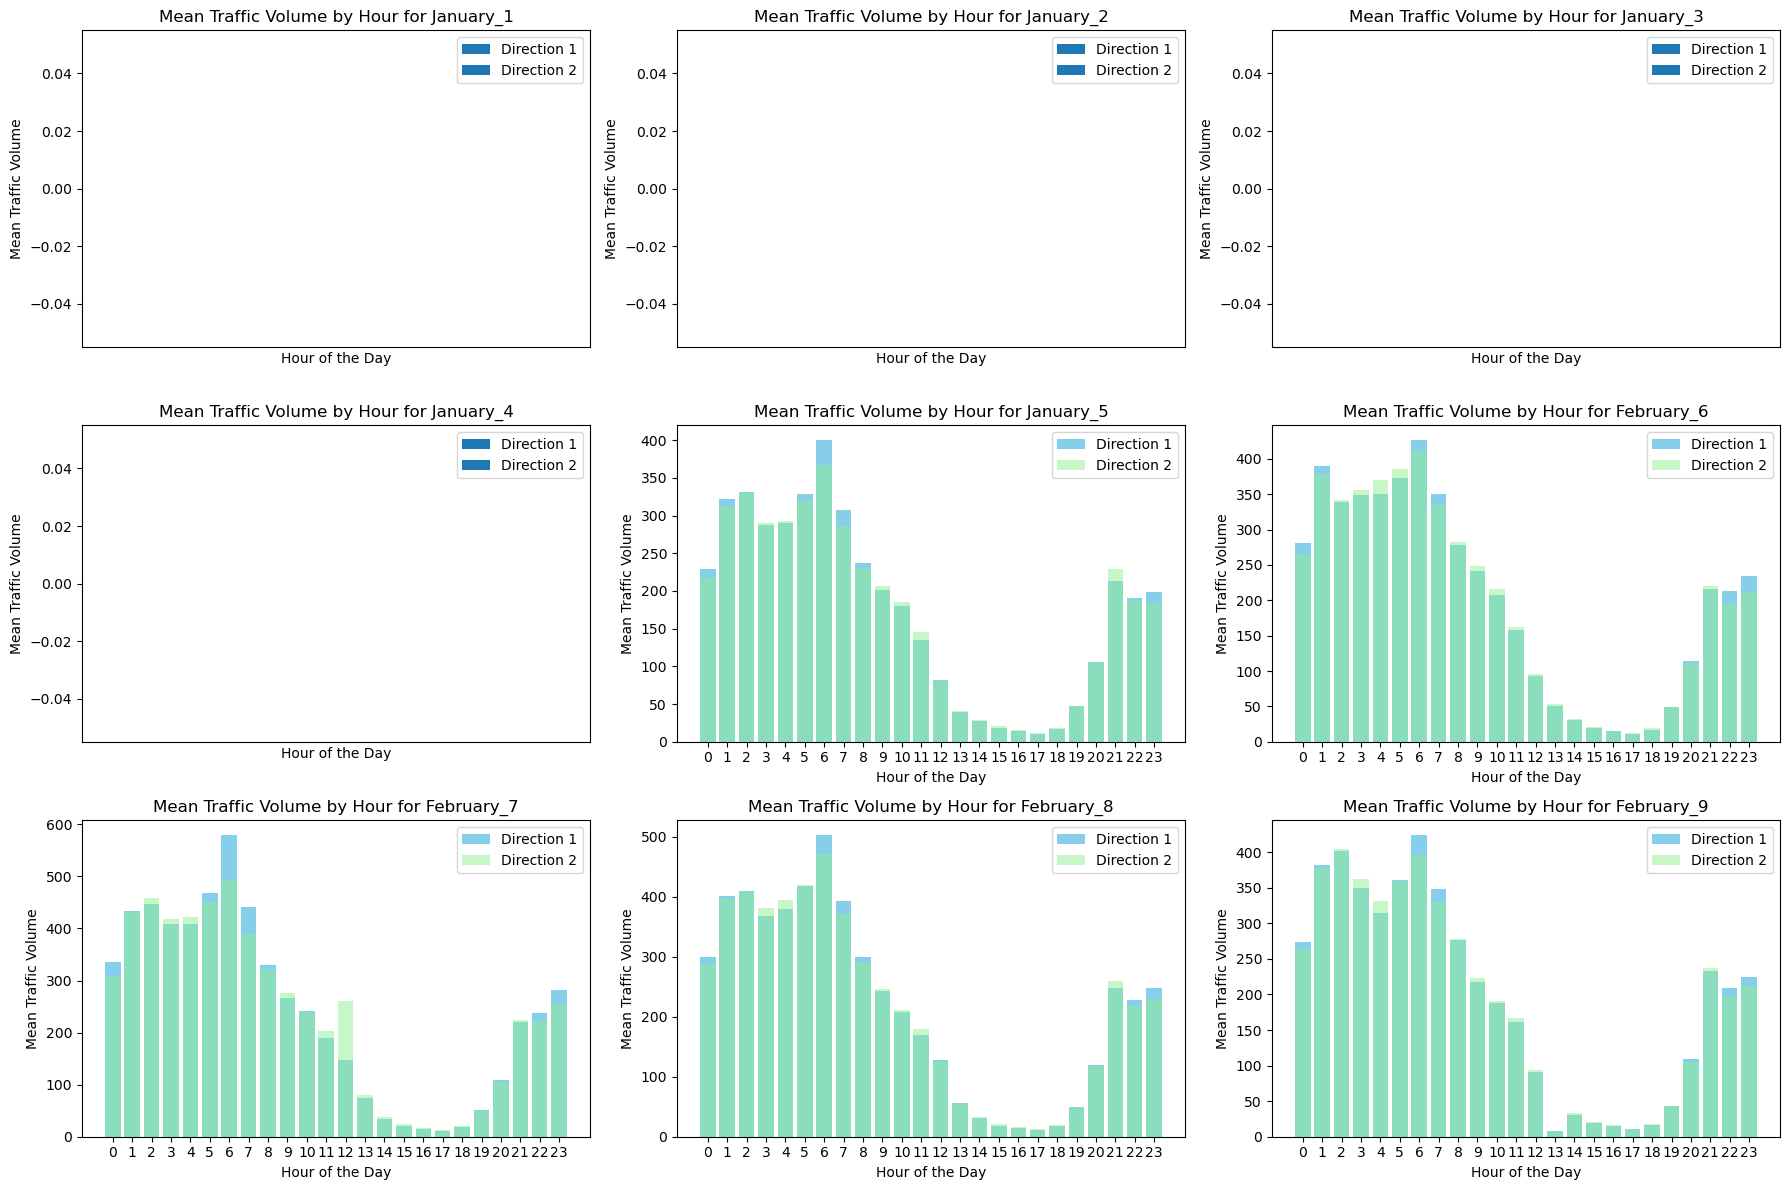

In [32]:
import matplotlib.pyplot as plt

# Define the grid size for the subplots
rows, cols = (3, 3)
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))  

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each key in the DataFrame and plot the graphs
for i, (index, row) in enumerate(keys_df.iterrows()):
    week_key = row['Keys']
    
    # Convert 'timestamp' column to datetime format
    merged_dataframes[week_key]['timestamp'] = pd.to_datetime(merged_dataframes[week_key]['timestamp'])
    # Extract hour from timestamp
    merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour
    # Group data by hour and calculate mean traffic volume for both directions
    hourly_traffic_dir1 = merged_dataframes[week_key].groupby('hour')['direction_1_x'].mean()
    hourly_traffic_dir2 = merged_dataframes[week_key].groupby('hour')['direction_2_x'].mean()

    # Check if we haven't exceeded the number of subplots
    if i < rows * cols:
        ax = axs[i]
        # Plot bar chart for direction 1 on the ith subplot
        ax.bar(hourly_traffic_dir1.index, hourly_traffic_dir1.values, color='skyblue', label='Direction 1')
        # Plot bar chart for direction 2 on the ith subplot
        ax.bar(hourly_traffic_dir2.index, hourly_traffic_dir2.values, color='lightgreen', alpha=0.5, label='Direction 2')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Mean Traffic Volume')
        ax.set_title(f'Mean Traffic Volume by Hour for {week_key}')
        ax.legend()
        ax.set_xticks(hourly_traffic_dir1.index)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Mean Traffic Volume with Rain for each hour

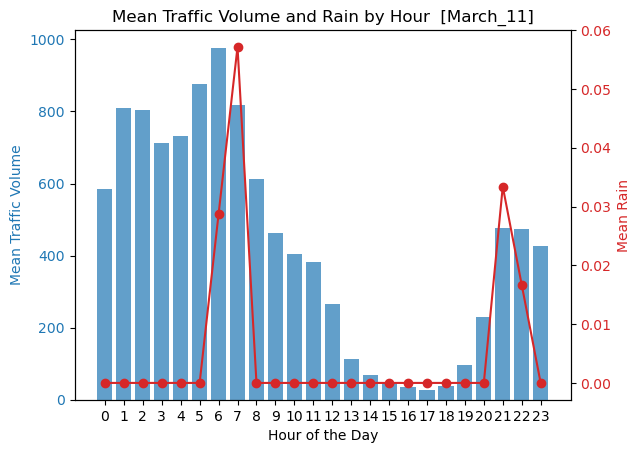

In [33]:

# Convert 'timestamp' column to datetime format
merged_dataframes[week_key]['timestamp'] = pd.to_datetime(merged_dataframes[week_key]['timestamp'])

# Extract hour from timestamp
merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume and mean rain
hourly_data = merged_dataframes[week_key].groupby('hour').agg({'total_of_directions': 'mean', 'rain': 'mean'})

# Plot bar chart
fig, ax1 = plt.subplots()

# Bar for traffic volume
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Mean Traffic Volume', color=color)
ax1.bar(hourly_data.index, hourly_data['total_of_directions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for rain
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean Rain', color=color)
ax2.plot(hourly_data.index, hourly_data['rain'], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Show plot
plt.title(f'Mean Traffic Volume and Rain by Hour  [{week_key}]')
plt.xticks(range(24))
plt.show()


## Mean Traffic Volume with weather variables for each hour and specific week

In [34]:
week_key = 'February_9'

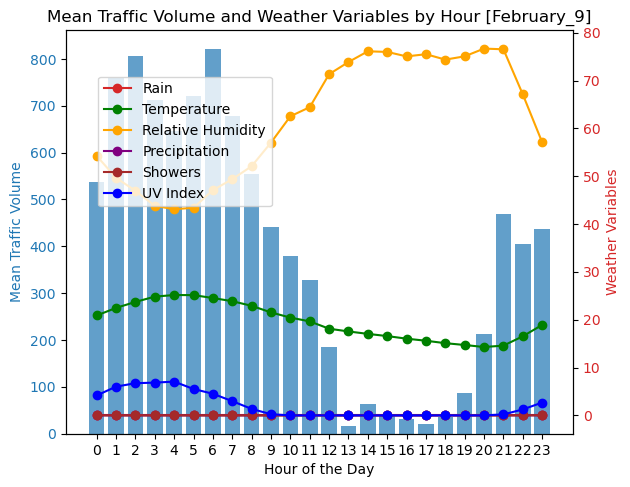

In [35]:

# Convert 'timestamp' column to datetime format
merged_dataframes[week_key]['timestamp'] = pd.to_datetime(merged_dataframes[week_key]['timestamp'])

# Extract hour from timestamp
merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour

# Group data by hour and calculate mean traffic volume and mean weather variables
hourly_data = merged_dataframes[week_key].groupby('hour').agg({
    'total_of_directions': 'mean', 
    'rain': 'mean', 
    'temperature_2m': 'mean', 
    'relative_humidity_2m': 'mean', 
    'precipitation': 'mean', 
    'showers': 'mean', 
    'uv_index': 'mean'
})

# Plot bar chart
fig, ax1 = plt.subplots()

# Bar for traffic volume
color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Mean Traffic Volume', color=color)
ax1.bar(hourly_data.index, hourly_data['total_of_directions'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for weather variables
ax2 = ax1.twinx()  

# Line plot for rain
color = 'tab:red'
ax2.set_ylabel('Weather Variables', color=color)
ax2.plot(hourly_data.index, hourly_data['rain'], color=color, linestyle='-', marker='o', label='Rain')
ax2.plot(hourly_data.index, hourly_data['temperature_2m'], color='green', linestyle='-', marker='o', label='Temperature')
ax2.plot(hourly_data.index, hourly_data['relative_humidity_2m'], color='orange', linestyle='-', marker='o', label='Relative Humidity')
ax2.plot(hourly_data.index, hourly_data['precipitation'], color='purple', linestyle='-', marker='o', label='Precipitation')
ax2.plot(hourly_data.index, hourly_data['showers'], color='brown', linestyle='-', marker='o', label='Showers')
ax2.plot(hourly_data.index, hourly_data['uv_index'], color='blue', linestyle='-', marker='o', label='UV Index')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.88))

# Show plot
plt.title(f'Mean Traffic Volume and Weather Variables by Hour [{week_key}]')
plt.xticks(range(24))
plt.show()


## Mean hourly precipitation

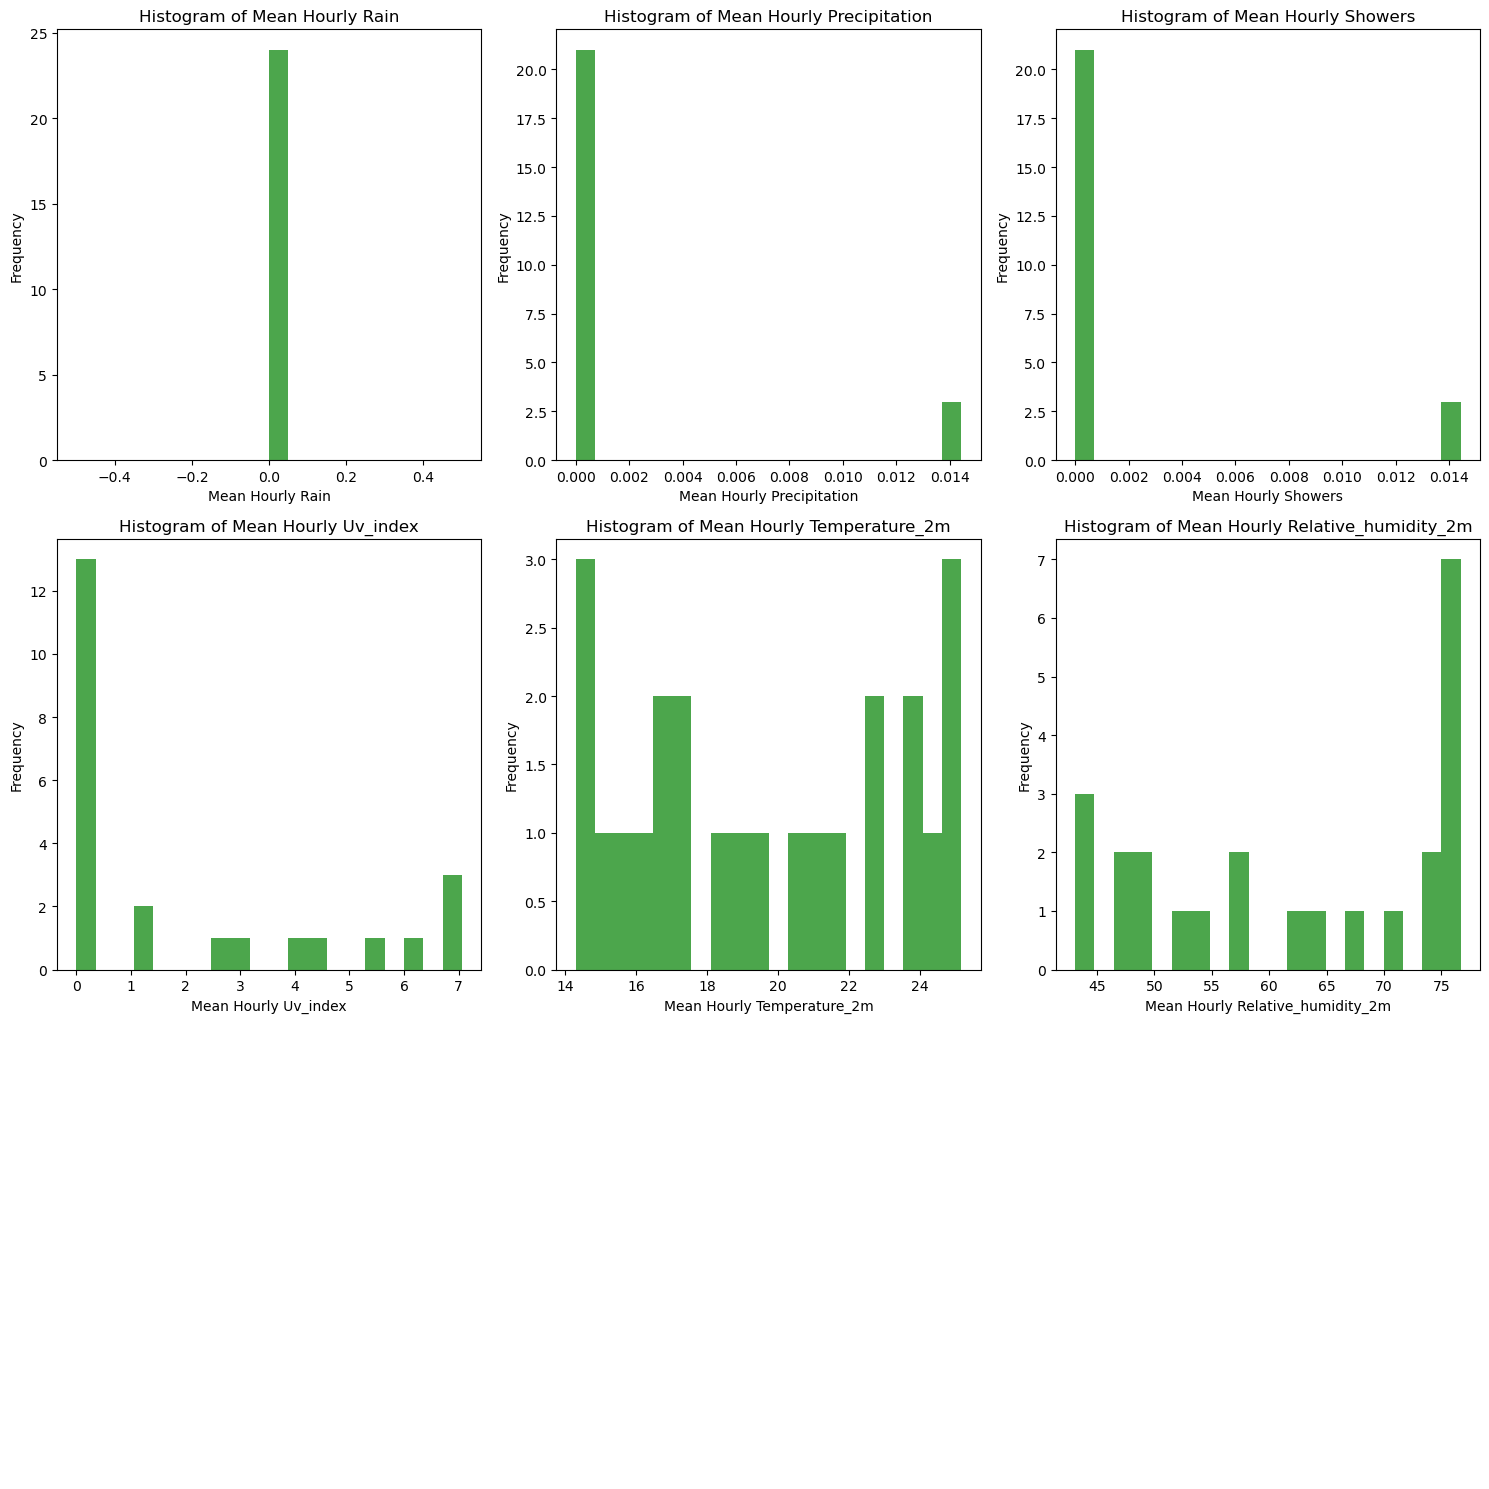

In [36]:
# Extract hour from timestamp
merged_dataframes[week_key]['hour'] = merged_dataframes[week_key]['timestamp'].dt.hour

# Define precipitation measures
precipitation_measures = ['rain', 'precipitation', 'showers','uv_index','temperature_2m','relative_humidity_2m'] 

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over precipitation measures
for i, measure in enumerate(precipitation_measures):
    # Group data by hour and calculate mean for the current precipitation measure
    hourly_data = merged_dataframes[week_key].groupby('hour')[measure].mean()
    
    # Plot histogram of mean hourly precipitation
    axes[i].hist(hourly_data, bins=20, color='green', alpha=0.7)
    axes[i].set_xlabel(f'Mean Hourly {measure.capitalize()}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Mean Hourly {measure.capitalize()}')

# Hide empty subplots (if any)
for ax in axes[len(precipitation_measures):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Traffic Volume with other features

ValueError: Cannot calculate a linear regression if all x values are identical

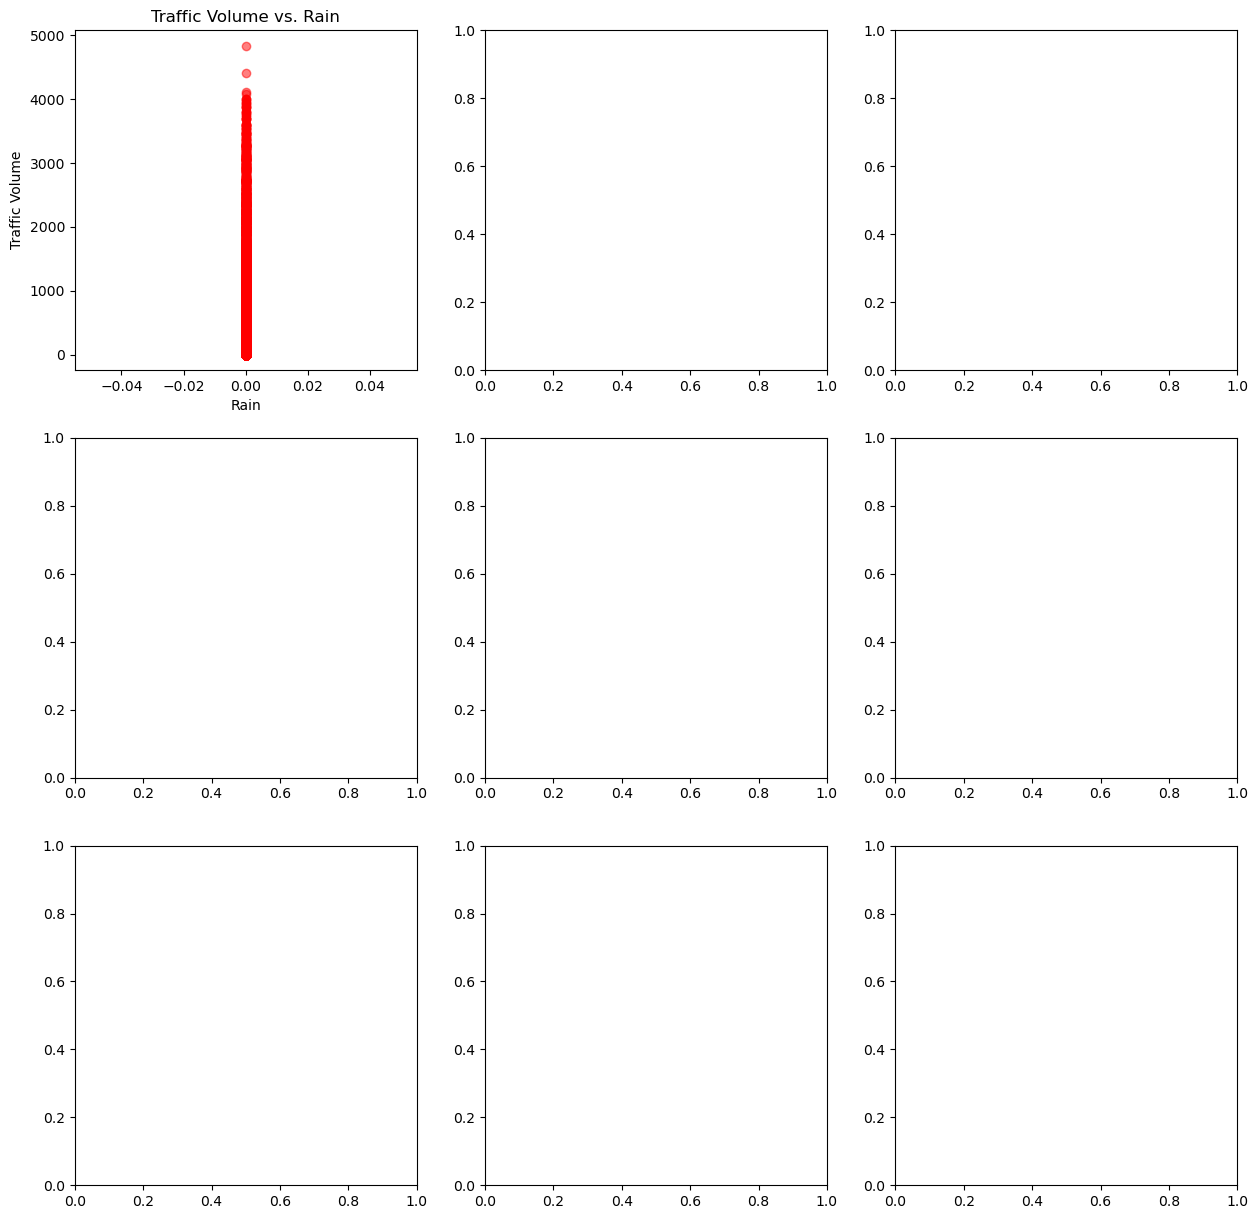

In [37]:

# Define function to calculate regression line
def plot_trend_line(x, y, ax):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='blue', linestyle='--', label=f'Trend Line (R²={r_value**2:.2f})')

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over precipitation measures
for i, measure in enumerate(precipitation_measures):
    # Scatter plot of traffic volume vs. the current precipitation measure
    axes[i].scatter(merged_dataframes[week_key][measure], merged_dataframes[week_key]['total_of_directions'], color='red', alpha=0.5)
    axes[i].set_xlabel(measure.capitalize())  # Set x-axis label
    axes[i].set_ylabel('Traffic Volume')  # Set y-axis label
    axes[i].set_title(f'Traffic Volume vs. {measure.capitalize()}')  # Set title
    
    # Calculate and plot trend line
    plot_trend_line(merged_dataframes[week_key][measure], merged_dataframes[week_key]['total_of_directions'], axes[i])

# Hide empty subplots (if any)
for ax in axes[len(precipitation_measures):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Combine all dfs into one

In [38]:

combined_dataframes_list = []

for key in keys_df['Keys']:
    # Append each dataframe to the list
    combined_dataframes_list.append(merged_dataframes[week_key])

all_weeks_combined = pd.concat(combined_dataframes_list, axis=0)

# Reset the index of the combined dataframe
all_weeks_combined.reset_index(drop=True, inplace=True)
all_weeks_combined



,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index,...,sensor_name_y,installation_date,note,location_type,status,direction_1_y,direction_2_y,location_y,date_only,hour
0,-37.818880,144.954492,2024-02-27 00:00:00+00:00,20.108500,58.0,0.0,0.0,0.0,0.0,4.90,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-27,0
1,-37.818880,144.954492,2024-02-27 01:00:00+00:00,22.808500,50.0,0.0,0.0,0.0,0.0,6.45,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-27,1
2,-37.818880,144.954492,2024-02-27 02:00:00+00:00,25.908501,43.0,0.0,0.0,0.0,0.0,7.55,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-27,2
3,-37.818880,144.954492,2024-02-27 03:00:00+00:00,28.558500,39.0,0.0,0.0,0.0,0.0,7.95,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-27,3
4,-37.818880,144.954492,2024-02-27 04:00:00+00:00,29.208500,39.0,0.0,0.0,0.0,0.0,7.65,...,Col620_T,2013-09-02,NaN,Outdoor,A,East,West,"-37.81887963, 144.95449198",2024-02-27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151817,-37.819973,144.958349,2024-03-04 19:00:00+00:00,10.958500,94.0,0.0,0.0,0.0,3.0,0.00,...,474Fl_T,2023-11-10,NaN,Outdoor,A,East,West,"-37.81997273, 144.95834911",2024-03-04,19
151818,-37.819973,144.958349,2024-03-04 20:00:00+00:00,10.508500,95.0,0.0,0.0,0.0,3.0,0.00,...,474Fl_T,2023-11-10,NaN,Outdoor,A,East,West,"-37.81997273, 144.95834911",2024-03-04,20
151819,-37.819973,144.958349,2024-03-04 21:00:00+00:00,10.858500,95.0,0.0,0.0,0.0,45.0,0.15,...,474Fl_T,2023-11-10,NaN,Outdoor,A,East,West,"-37.81997273, 144.95834911",2024-03-04,21
151820,-37.819973,144.958349,2024-03-04 22:00:00+00:00,13.708500,79.0,0.0,0.0,0.0,0.0,1.10,...,474Fl_T,2023-11-10,NaN,Outdoor,A,East,West,"-37.81997273, 144.95834911",2024-03-04,22


## Normalizing the columns

In [39]:


# Display the data types of all columns
print(all_weeks_combined.dtypes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to normalize
columns_to_normalize = ['total_of_directions', 'temperature_2m', 'relative_humidity_2m',
                        'precipitation', 'rain', 'showers', 'weather_code', 'uv_index']

# Fit the scaler on the data and transform it
all_weeks_combined[columns_to_normalize] = scaler.fit_transform(all_weeks_combined[columns_to_normalize])

# Print the scaled DataFrame
print(all_weeks_combined)


latitude                            float64
longitude                           float64
timestamp               datetime64[ns, UTC]
temperature_2m                      float32
relative_humidity_2m                float32
precipitation                       float32
rain                                float32
showers                             float32
weather_code                        float32
uv_index                            float32
sensor_name_x                        object
locationid                          float64
direction_1_x                       float64
direction_2_x                       float64
total_of_directions                 float64
location_x                           object
location_id                           int64
sensor_description                   object
sensor_name_y                        object
installation_date                    object
note                                 object
location_type                        object
status                          

## Check Unique Values

In [40]:
unique_values = all_weeks_combined['direction_1_y'].unique()
print(unique_values)
unique_values2 = all_weeks_combined['direction_2_y'].unique()
print(unique_values2)

['East' 'North']
['West' 'South']


In [41]:
# Display the data types of all columns
print(all_weeks_combined.dtypes)

latitude                            float64
longitude                           float64
timestamp               datetime64[ns, UTC]
temperature_2m                      float64
relative_humidity_2m                float64
precipitation                       float64
rain                                float64
showers                             float64
weather_code                        float64
uv_index                            float64
sensor_name_x                        object
locationid                          float64
direction_1_x                       float64
direction_2_x                       float64
total_of_directions                 float64
location_x                           object
location_id                           int64
sensor_description                   object
sensor_name_y                        object
installation_date                    object
note                                 object
location_type                        object
status                          

## One Hot Encorder for direction_1y and direction_2y

In [42]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # sparse=False ensures output is a numpy array

# Check if columns exist to avoid KeyError
if {'direction_1_y', 'direction_2_y'}.issubset(all_weeks_combined.columns):
    # Fit and transform the data
    encoded_data = encoder.fit_transform(all_weeks_combined[['direction_1_y', 'direction_2_y']])
    
    # Get the feature names from the encoder
    encoded_feature_names = encoder.get_feature_names_out(['direction_1_y', 'direction_2_y'])
    
    # Create a DataFrame with the encoded data and the generated feature names
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
    
    # Concatenate the encoded data back to the original DataFrame
    all_weeks_combined = pd.concat([all_weeks_combined.drop(['direction_1_y', 'direction_2_y'], axis=1), encoded_df], axis=1)
    print(all_weeks_combined.head())
else:
    print("Columns 'direction_1_y' or 'direction_2_y' are not found in the DataFrame.")


E:\ANACONDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   latitude   longitude                 timestamp  temperature_2m  \
0 -37.81888  144.954492 2024-02-27 00:00:00+00:00        0.380952   
1 -37.81888  144.954492 2024-02-27 01:00:00+00:00        0.488095   
2 -37.81888  144.954492 2024-02-27 02:00:00+00:00        0.611111   
3 -37.81888  144.954492 2024-02-27 03:00:00+00:00        0.716270   
4 -37.81888  144.954492 2024-02-27 04:00:00+00:00        0.742063   

   relative_humidity_2m  precipitation  rain  showers  weather_code  uv_index  \
0              0.452055            0.0   0.0      0.0           0.0  0.616352   
1              0.342466            0.0   0.0      0.0           0.0  0.811321   
2              0.246575            0.0   0.0      0.0           0.0  0.949686   
3              0.191781            0.0   0.0      0.0           0.0  1.000000   
4              0.191781            0.0   0.0      0.0           0.0  0.962264   

   ... note  location_type  status                  location_y   date_only  \
0  ...  NaN        O

In [43]:
print(all_weeks_combined.columns)  # This will list all column names in the DataFrame
all_weeks_combined

Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index', 'sensor_name_x', 'locationid',
       'direction_1_x', 'direction_2_x', 'total_of_directions', 'location_x',
       'location_id', 'sensor_description', 'sensor_name_y',
       'installation_date', 'note', 'location_type', 'status', 'location_y',
       'date_only', 'hour', 'direction_1_y_East', 'direction_1_y_North',
       'direction_2_y_South', 'direction_2_y_West'],
      dtype='object')


,latitude,longitude,timestamp,temperature_2m,relative_humidity_2m,precipitation,rain,showers,weather_code,uv_index,...,note,location_type,status,location_y,date_only,hour,direction_1_y_East,direction_1_y_North,direction_2_y_South,direction_2_y_West
0,-37.818880,144.954492,2024-02-27 00:00:00+00:00,0.380952,0.452055,0.0,0.0,0.0,0.000000,0.616352,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-27,0,1.0,0.0,0.0,1.0
1,-37.818880,144.954492,2024-02-27 01:00:00+00:00,0.488095,0.342466,0.0,0.0,0.0,0.000000,0.811321,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-27,1,1.0,0.0,0.0,1.0
2,-37.818880,144.954492,2024-02-27 02:00:00+00:00,0.611111,0.246575,0.0,0.0,0.0,0.000000,0.949686,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-27,2,1.0,0.0,0.0,1.0
3,-37.818880,144.954492,2024-02-27 03:00:00+00:00,0.716270,0.191781,0.0,0.0,0.0,0.000000,1.000000,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-27,3,1.0,0.0,0.0,1.0
4,-37.818880,144.954492,2024-02-27 04:00:00+00:00,0.742063,0.191781,0.0,0.0,0.0,0.000000,0.962264,...,NaN,Outdoor,A,"-37.81887963, 144.95449198",2024-02-27,4,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151817,-37.819973,144.958349,2024-03-04 19:00:00+00:00,0.017857,0.945205,0.0,0.0,0.0,0.066667,0.000000,...,NaN,Outdoor,A,"-37.81997273, 144.95834911",2024-03-04,19,1.0,0.0,0.0,1.0
151818,-37.819973,144.958349,2024-03-04 20:00:00+00:00,0.000000,0.958904,0.0,0.0,0.0,0.066667,0.000000,...,NaN,Outdoor,A,"-37.81997273, 144.95834911",2024-03-04,20,1.0,0.0,0.0,1.0
151819,-37.819973,144.958349,2024-03-04 21:00:00+00:00,0.013889,0.958904,0.0,0.0,0.0,1.000000,0.018868,...,NaN,Outdoor,A,"-37.81997273, 144.95834911",2024-03-04,21,1.0,0.0,0.0,1.0
151820,-37.819973,144.958349,2024-03-04 22:00:00+00:00,0.126984,0.739726,0.0,0.0,0.0,0.000000,0.138365,...,NaN,Outdoor,A,"-37.81997273, 144.95834911",2024-03-04,22,1.0,0.0,0.0,1.0


## Hash encording for the locationId column

In [44]:
# from sklearn.feature_extraction import FeatureHasher

# # Initialize the hasher specifying the number of features 
# n_features = 10

# # Create the hasher instance with input_type set to default as it expects tuples
# hasher = FeatureHasher(n_features=n_features, input_type='pair')

# # Prepare the 'location_id' for hashing by converting each id into a tuple of (id, value)
# # The value '1' can be used since we're simply encoding the presence of each location_id
# hashed_input = [((str(loc_id), 1),) for loc_id in all_weeks_combined['location_id']]

# # Apply the hasher to the prepared input
# hashed_features = hasher.transform(hashed_input)

# # Convert the hashed features to a DataFrame for easier integration into your existing dataset
# hashed_features_df = pd.DataFrame(hashed_features.toarray(), columns=[f'hashed_{i}' for i in range(n_features)])

# # Concatenate the hashed features back into the main DataFrame
# all_weeks_combined = pd.concat([all_weeks_combined.drop('location_id', axis=1), hashed_features_df], axis=1)

# # Example to display the first few rows of the updated DataFrame
# print(all_weeks_combined.head())


In [45]:
print(all_weeks_combined.columns)


Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index', 'sensor_name_x', 'locationid',
       'direction_1_x', 'direction_2_x', 'total_of_directions', 'location_x',
       'location_id', 'sensor_description', 'sensor_name_y',
       'installation_date', 'note', 'location_type', 'status', 'location_y',
       'date_only', 'hour', 'direction_1_y_East', 'direction_1_y_North',
       'direction_2_y_South', 'direction_2_y_West'],
      dtype='object')


## Check correlation only weather features

In [46]:
selected_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain', 'showers', 'uv_index']  
correlation_matrix2 = all_weeks_combined[selected_columns].corr()

# Display the correlation matrix
correlation_matrix2

,temperature_2m,relative_humidity_2m,precipitation,rain,showers,uv_index
temperature_2m,1.000000,-0.768362,-0.055570,NaN,-0.055570,0.496518
relative_humidity_2m,-0.768362,1.000000,0.064290,NaN,0.064290,-0.612280
precipitation,-0.055570,0.064290,1.000000,NaN,1.000000,-0.022774
rain,NaN,NaN,NaN,NaN,NaN,NaN
showers,-0.055570,0.064290,1.000000,NaN,1.000000,-0.022774
uv_index,0.496518,-0.612280,-0.022774,NaN,-0.022774,1.000000


## Correlation Map for weather features only 

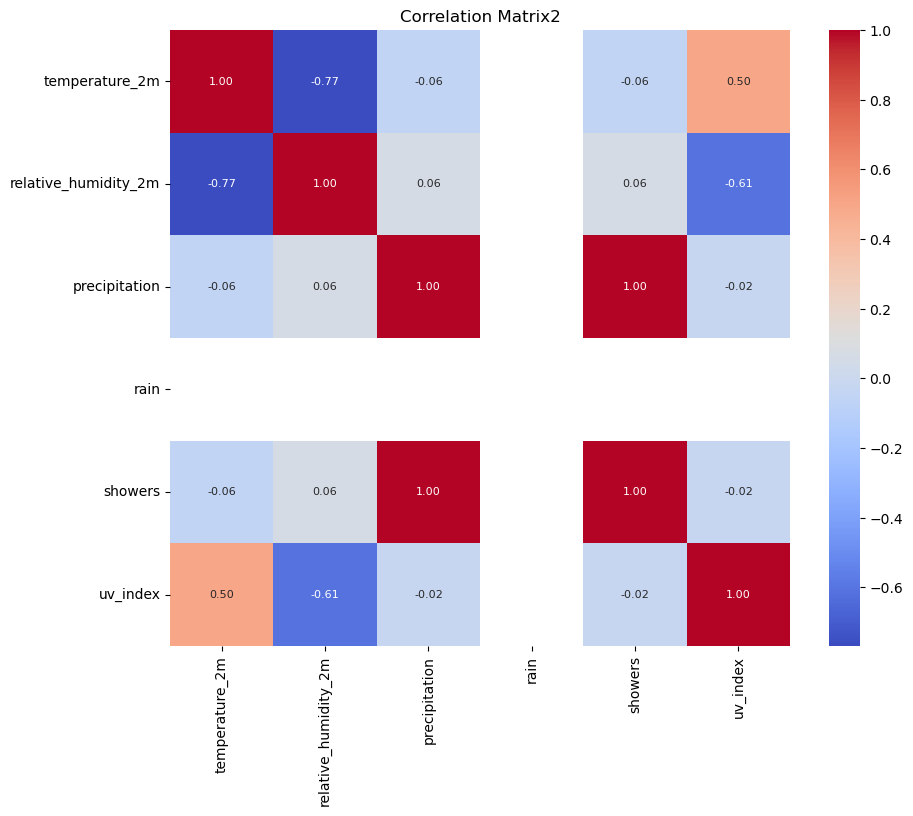

In [47]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 8})
plt.title('Correlation Matrix2')
plt.show()


## Check VIF for weather features to check multicollinearity

In [48]:


# Assuming df is your dataframe with the predictors
predictors = all_weeks_combined[['temperature_2m',  'uv_index', 'showers', 'rain','relative_humidity_2m']]
# Add a constant term for intercept
predictors = sm.add_constant(predictors)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns

vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
                   for i in range(len(predictors.columns))]

print(vif_data)


                feature        VIF
0                 const  36.571459
1        temperature_2m   2.448063
2              uv_index   1.604712
3               showers   1.004711
4                  rain        NaN
5  relative_humidity_2m   2.955046


E:\ANACONDA\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


## OLS Model with only weather Features 

In [49]:

def perform_regression(df):
    # Make sure to replace these with the actual columns from your dataframe
    X = df[['temperature_2m',  'uv_index', 'showers', 'rain']]
    y = df['total_of_directions']
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Adding a constant to the model for the intercept
    X_train_with_const = sm.add_constant(X_train)
    X_test_with_const = sm.add_constant(X_test)
    
    # Creating an OLS model with statsmodels
    model = sm.OLS(y_train, X_train_with_const).fit()
    
    # Output the summary of the model
    print(model.summary())
    
    # You can directly access AIC and BIC from the model object
    print(f'AIC: {model.aic}')
    print(f'BIC: {model.bic}')

# Assuming df is your dataframe with all necessary data
perform_regression(all_weeks_combined)

# Uncomment the last line and replace `df` with your actual dataframe variable when you run this.


                             OLS Regression Results                            
Dep. Variable:     total_of_directions   R-squared:                       0.138
Model:                             OLS   Adj. R-squared:                  0.138
Method:                  Least Squares   F-statistic:                     6504.
Date:                 Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                         00:51:21   Log-Likelihood:                 88776.
No. Observations:               121457   AIC:                        -1.775e+05
Df Residuals:                   121453   BIC:                        -1.775e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0389      0.0

E:\ANACONDA\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


## One-hot encode the location_id column

In [50]:
location_dummies = pd.get_dummies(all_weeks_combined['location_id'], prefix='location')
all_weeks_combined = pd.concat([all_weeks_combined, location_dummies], axis=1)
all_weeks_combined.columns

Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index',
       ...
       'location_132', 'location_133', 'location_134', 'location_135',
       'location_136', 'location_137', 'location_139', 'location_140',
       'location_141', 'location_142'],
      dtype='object', length=116)

## Calculate the correlation matrix for the numerical columns of interest + Categorical location ID

In [51]:
selected_data = all_weeks_combined.drop([ 'timestamp','longitude','latitude','direction_1_x',
       'direction_2_x', 'total_of_directions'], axis=1)
#selected_columns = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain', 'showers', 'uv_index']  
correlation_matrix = all_weeks_combined[selected_columns].corr()
#correlation_matrix = selected_data.corr()
# Display the correlation matrix
correlation_matrix


,temperature_2m,relative_humidity_2m,precipitation,rain,showers,uv_index
temperature_2m,1.000000,-0.768362,-0.055570,NaN,-0.055570,0.496518
relative_humidity_2m,-0.768362,1.000000,0.064290,NaN,0.064290,-0.612280
precipitation,-0.055570,0.064290,1.000000,NaN,1.000000,-0.022774
rain,NaN,NaN,NaN,NaN,NaN,NaN
showers,-0.055570,0.064290,1.000000,NaN,1.000000,-0.022774
uv_index,0.496518,-0.612280,-0.022774,NaN,-0.022774,1.000000


In [52]:
all_weeks_combined[  'total_of_directions']


0         0.231342
1         0.310316
2         0.302460
3         0.304528
4         0.108745
            ...   
151817    0.007236
151818    0.023362
151819    0.059955
151820    0.041968
151821    0.044242
Name: total_of_directions, Length: 151822, dtype: float64

In [53]:
all_weeks_combined.dtypes


latitude                            float64
longitude                           float64
timestamp               datetime64[ns, UTC]
temperature_2m                      float64
relative_humidity_2m                float64
                               ...         
location_137                           bool
location_139                           bool
location_140                           bool
location_141                           bool
location_142                           bool
Length: 116, dtype: object

In [54]:
all_weeks_combined = all_weeks_combined.drop([ 'sensor_name_x',   'location_x', 'location_id', 'sensor_description', 'sensor_name_y', 'installation_date', 'note', 'location_type', 'status', 'location_y', 'date_only', 'hour', 'direction_1_y_East', 'direction_1_y_North', 'direction_2_y_South', 'direction_2_y_West'], axis=1)
print(all_weeks_combined)


         latitude   longitude                 timestamp  temperature_2m  \
0      -37.818880  144.954492 2024-02-27 00:00:00+00:00        0.380952   
1      -37.818880  144.954492 2024-02-27 01:00:00+00:00        0.488095   
2      -37.818880  144.954492 2024-02-27 02:00:00+00:00        0.611111   
3      -37.818880  144.954492 2024-02-27 03:00:00+00:00        0.716270   
4      -37.818880  144.954492 2024-02-27 04:00:00+00:00        0.742063   
...           ...         ...                       ...             ...   
151817 -37.819973  144.958349 2024-03-04 19:00:00+00:00        0.017857   
151818 -37.819973  144.958349 2024-03-04 20:00:00+00:00        0.000000   
151819 -37.819973  144.958349 2024-03-04 21:00:00+00:00        0.013889   
151820 -37.819973  144.958349 2024-03-04 22:00:00+00:00        0.126984   
151821 -37.819973  144.958349 2024-03-04 23:00:00+00:00        0.347222   

        relative_humidity_2m  precipitation  rain  showers  weather_code  \
0                   0.4

In [55]:
# Assuming 'df' is your DataFrame
def find_column_with_value(df, value):
    for column in df.columns:
        if df[column].dtype == object:  # Check only object type columns to simplify
            if (df[column] == value).any():
                return column
    return None

# Call the function to find the column name
column_name = find_column_with_value(all_weeks_combined, 'Que85_T')
if column_name:
    print(f"'Que85_T' is found in the column: {column_name}")
else:
    print("No column contains 'Que85_T'")


No column contains 'Que85_T'


In [56]:
print(all_weeks_combined.columns.tolist())

['latitude', 'longitude', 'timestamp', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain', 'showers', 'weather_code', 'uv_index', 'locationid', 'direction_1_x', 'direction_2_x', 'total_of_directions', 'location_1', 'location_2', 'location_3', 'location_4', 'location_5', 'location_6', 'location_7', 'location_8', 'location_9', 'location_10', 'location_11', 'location_12', 'location_14', 'location_17', 'location_18', 'location_19', 'location_20', 'location_21', 'location_23', 'location_24', 'location_25', 'location_27', 'location_28', 'location_29', 'location_30', 'location_31', 'location_35', 'location_36', 'location_37', 'location_39', 'location_40', 'location_41', 'location_43', 'location_44', 'location_45', 'location_46', 'location_47', 'location_48', 'location_49', 'location_50', 'location_51', 'location_52', 'location_53', 'location_54', 'location_56', 'location_58', 'location_59', 'location_61', 'location_62', 'location_63', 'location_65', 'location_66', 'location_67'

## Model with weather features + locationid 

In [57]:
def perform_regression(df):
    # Selecting the target variable and features
    #X = df[['temperature_2m', 'relative_humidity_2m', 'uv_index','showers','rain']]  
    # Mean Squared Error: 0.005115399601514251
    # R^2 Score: 0.1291088971360574

    
    X = df.drop(['timestamp', 'longitude', 'latitude', 'direction_1_x', 'direction_2_x', 'total_of_directions'], axis=1)
    y = df['total_of_directions']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


# Call the function with your DataFrame
perform_regression(all_weeks_combined)  # Adjust parameters as needed based on the correlation results


Mean Squared Error: 0.007603563829249685
R^2 Score: 0.5326472387119732


In [58]:
all_weeks_combined.columns

Index(['latitude', 'longitude', 'timestamp', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'rain', 'showers',
       'weather_code', 'uv_index', 'locationid', 'direction_1_x',
       'direction_2_x', 'total_of_directions', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'location_7',
       'location_8', 'location_9', 'location_10', 'location_11', 'location_12',
       'location_14', 'location_17', 'location_18', 'location_19',
       'location_20', 'location_21', 'location_23', 'location_24',
       'location_25', 'location_27', 'location_28', 'location_29',
       'location_30', 'location_31', 'location_35', 'location_36',
       'location_37', 'location_39', 'location_40', 'location_41',
       'location_43', 'location_44', 'location_45', 'location_46',
       'location_47', 'location_48', 'location_49', 'location_50',
       'location_51', 'location_52', 'location_53', 'location_54',
       'location_56', 'location_58',

In [59]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error

# def perform_advanced_regression(all_weeks_combined):
#     # Selecting the target variable and features
#     X = all_weeks_combined.drop(['timestamp', 'longitude', 'latitude', 'direction_1_x', 'direction_2_x', 'total_of_directions'], axis=1)
#     y = all_weeks_combined['total_of_directions']

#     # Adding polynomial features
#     poly_model = make_pipeline(PolynomialFeatures(2), Ridge())

#     # Cross-validation
#     scores = cross_val_score(poly_model, X, y, cv=5, scoring='r2')
#     print(f"Cross-validated R^2 scores: {scores}")
#     print(f"Average R^2 score: {scores.mean()}")

# # Call the function with your DataFrame
# perform_advanced_regression(all_weeks_combined)


In [60]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# def perform_random_forest_regression(df):
#     X = all_weeks_combined[['temperature_2m', ]]
#     y = all_weeks_combined['total_of_directions']
    
#     # Random Forest model
#     rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
#     # Fitting the model
#     rf_model.fit(X, y)
    
#     # Cross-validation
#     scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
#     print(f"Cross-validated R^2 scores: {scores}")
#     print(f"Average R^2 score: {scores.mean()}")

#     # Feature importance
#     importances = rf_model.feature_importances_
#     feature_names = X.columns
#     importance_dict = dict(zip(feature_names, importances))
#     print("Feature importances:", importance_dict)

# # Call the function
# perform_random_forest_regression(all_weeks_combined)


In [61]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score

# def perform_xgboost_regression(df):
#     X = dfall_weeks_combined[['temperature_2m', 'relative_humidity_2m', 'uv_index', 'showers', 'rain']]
#     y = all_weeks_combined['total_of_directions']

#     # XGBoost model
#     xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    
#     # Fitting the model
#     xgb_model.fit(X, y)
    
#     # Cross-validation
#     scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
#     print(f"Cross-validated R^2 scores: {scores}")
#     print(f"Average R^2 score: {scores.mean()}")

#     # Feature importance
#     importances = xgb_model.feature_importances_
#     feature_names = X.columns
#     importance_dict = dict(zip(feature_names, importances))
#     print("Feature importances:", importance_dict)

# # Call the function
# perform_xgboost_regression(all_weeks_combined)


# Footpath Steepness

## Map

In [62]:
# Define the HTML code for the map
html_code = """
<iframe src="https://data.melbourne.vic.gov.au/explore/embed/dataset/footpath-steepness/map/?location=16,-37.81284,144.95249&basemap=mbs-7a7333" width="1100" height="600" frameborder="0"></iframe>
"""

# Display the map in the notebook
HTML(html_code)


In [63]:
print(footpath_steepness.dtypes)

geo_point_2d     object
geo_shape        object
grade1in        float64
gradepc         float64
segside          object
statusid        float64
asset_type       object
deltaz          float64
streetid        float64
mccid_int       float64
mcc_id            int64
address          object
rlmax           float64
rlmin           float64
distance        float64
dtype: object


In [64]:
footpath_steepness

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance
0,"-37.823036142583945, 144.94866061456034","{""coordinates"": [[[[144.94865791889143, -37.82...",4.2,23.81,NaN,8.0,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43
1,"-37.79542957518662, 144.91714933764632","{""coordinates"": [[[[144.9171360775573, -37.795...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
2,"-37.79544286753349, 144.9172426574227","{""coordinates"": [[[[144.917238930522, -37.7954...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1534622,NaN,NaN,NaN,NaN
3,"-37.79580169415494, 144.92075182140118","{""coordinates"": [[[144.92074176246658, -37.795...",35.1,2.85,NaN,NaN,Road Footway,0.23,NaN,NaN,1387592,NaN,2.78,2.55,8.07
4,"-37.79654832375531, 144.92328274904054","{""coordinates"": [[[[144.92328246984576, -37.79...",109.6,0.91,NaN,NaN,Road Footway,0.01,NaN,NaN,1387085,NaN,3.39,3.38,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33580,"-37.80166668168155, 144.94353746774505","{""coordinates"": [[[[144.94350389586447, -37.80...",NaN,NaN,NaN,NaN,Road Footway,NaN,NaN,NaN,1385182,NaN,NaN,NaN,NaN
33581,"-37.80169795826924, 144.9433029188373","{""coordinates"": [[[[144.9433008833934, -37.801...",NaN,NaN,NaN,4.0,Road Footway,NaN,2987.0,30333.0,1385189,Pl5230,NaN,NaN,NaN
33582,"-37.802241487751616, 144.9434698881252",NaN,23.3,4.30,NaN,NaN,Road Footway,2.20,NaN,NaN,1385334,NaN,15.15,12.95,51.21
33583,"-37.8024821678599, 144.94316039147643","{""coordinates"": [[[[144.94311328357037, -37.80...",20.2,4.94,NaN,NaN,Road Footway,1.00,NaN,NaN,1385191,NaN,15.95,14.95,20.25


## Import footpath steepness dataset as geojson file

                                        geo_point_2d geo_shape  grade1in  \
0  {'lon': 144.94866061456034, 'lat': -37.8230361...      None       4.2   
1  {'lon': 144.91714933764632, 'lat': -37.7954295...      None       NaN   
2  {'lon': 144.9172426574227, 'lat': -37.79544286...      None       NaN   
3  {'lon': 144.92075182140118, 'lat': -37.7958016...      None      35.1   
4  {'lon': 144.92328274904054, 'lat': -37.7965483...      None     109.6   

   gradepc segside statusid    asset_type  deltaz  streetid  mccid_int  \
0    23.81    None        8  Road Footway    6.77    3094.0    30821.0   
1      NaN    None     None  Road Footway     NaN       NaN        NaN   
2      NaN    None     None  Road Footway     NaN       NaN        NaN   
3     2.85    None     None  Road Footway    0.23       NaN        NaN   
4     0.91    None     None  Road Footway    0.01       NaN        NaN   

    mcc_id      address  rlmax  rlmin  distance  \
0  1388075  Yarra River   6.86   0.09     28.43

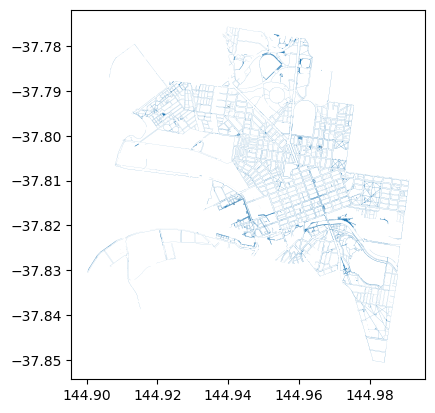

In [65]:
# Load the GeoJSON into a GeoDataFrame
gdf = gpd.read_file('footpath-steepness.geojson')

# Check the first few records to understand what the data looks like
print(gdf.head())

# Perform a quick plot to visualize
gdf.plot()

# Show the plot
plt.show()


In [66]:
gdf

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry
0,"{'lon': 144.94866061456034, 'lat': -37.8230361...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94866 -37.82304, 144.94864..."
1,"{'lon': 144.91714933764632, 'lat': -37.7954295...",None,NaN,NaN,None,None,Road Footway,NaN,NaN,NaN,1534622,None,NaN,NaN,NaN,"MULTIPOLYGON (((144.91714 -37.79544, 144.91714..."
2,"{'lon': 144.9172426574227, 'lat': -37.79544286...",None,NaN,NaN,None,None,Road Footway,NaN,NaN,NaN,1534622,None,NaN,NaN,NaN,"MULTIPOLYGON (((144.91724 -37.79544, 144.91724..."
3,"{'lon': 144.92075182140118, 'lat': -37.7958016...",None,35.1,2.85,None,None,Road Footway,0.23,NaN,NaN,1387592,None,2.78,2.55,8.07,"POLYGON ((144.92074 -37.79579, 144.92086 -37.7..."
4,"{'lon': 144.92328274904054, 'lat': -37.7965483...",None,109.6,0.91,None,None,Road Footway,0.01,NaN,NaN,1387085,None,3.39,3.38,1.11,"MULTIPOLYGON (((144.92328 -37.79655, 144.92328..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33580,"{'lon': 144.94353746774505, 'lat': -37.8016666...",None,NaN,NaN,None,None,Road Footway,NaN,NaN,NaN,1385182,None,NaN,NaN,NaN,"MULTIPOLYGON (((144.94350 -37.80166, 144.94355..."
33581,"{'lon': 144.9433029188373, 'lat': -37.80169795...",None,NaN,NaN,None,4,Road Footway,NaN,2987.0,30333.0,1385189,Pl5230,NaN,NaN,NaN,"MULTIPOLYGON (((144.94330 -37.80170, 144.94331..."
33582,"{'lon': 144.9434698881252, 'lat': -37.80224148...",None,23.3,4.30,None,None,Road Footway,2.20,NaN,NaN,1385334,None,15.15,12.95,51.21,None
33583,"{'lon': 144.94316039147643, 'lat': -37.8024821...",None,20.2,4.94,None,None,Road Footway,1.00,NaN,NaN,1385191,None,15.95,14.95,20.25,"MULTIPOLYGON (((144.94311 -37.80248, 144.94325..."


## Clean dataset

In [67]:
columns_to_check = ['grade1in', 'gradepc', 'deltaz', 'rlmax', 'rlmin', 'distance']

# Drop rows where all the specified columns are missing
gdf_cleaned = gdf.dropna(subset=columns_to_check, how='all')

# Display the first few rows of the cleaned DataFrame to verify the operation
gdf_cleaned

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry
0,"{'lon': 144.94866061456034, 'lat': -37.8230361...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94866 -37.82304, 144.94864..."
3,"{'lon': 144.92075182140118, 'lat': -37.7958016...",None,35.1,2.85,None,None,Road Footway,0.23,NaN,NaN,1387592,None,2.78,2.55,8.07,"POLYGON ((144.92074 -37.79579, 144.92086 -37.7..."
4,"{'lon': 144.92328274904054, 'lat': -37.7965483...",None,109.6,0.91,None,None,Road Footway,0.01,NaN,NaN,1387085,None,3.39,3.38,1.11,"MULTIPOLYGON (((144.92328 -37.79655, 144.92328..."
5,"{'lon': 144.94832553398277, 'lat': -37.8235575...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94832 -37.82359, 144.94832..."
6,"{'lon': 144.94735216082958, 'lat': -37.8236801...",None,17.1,5.85,None,8,Road Footway,5.22,3094.0,30734.0,1450305,Yarra River,5.31,0.09,89.26,"MULTIPOLYGON (((144.94735 -37.82369, 144.94735..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33577,"{'lon': 144.94351752750893, 'lat': -37.8019853...",None,23.3,4.30,West,1,Road Footway,2.20,585.0,21044.0,1385334,Dryburgh Street between Queensberry Street and...,15.15,12.95,51.21,"MULTIPOLYGON (((144.94355 -37.80172, 144.94358..."
33579,"{'lon': 144.94306167406037, 'lat': -37.8012486...",None,22.2,4.51,None,None,Road Footway,0.96,NaN,NaN,1385212,None,8.52,7.56,21.29,"MULTIPOLYGON (((144.94303 -37.80134, 144.94308..."
33582,"{'lon': 144.9434698881252, 'lat': -37.80224148...",None,23.3,4.30,None,None,Road Footway,2.20,NaN,NaN,1385334,None,15.15,12.95,51.21,None
33583,"{'lon': 144.94316039147643, 'lat': -37.8024821...",None,20.2,4.94,None,None,Road Footway,1.00,NaN,NaN,1385191,None,15.95,14.95,20.25,"MULTIPOLYGON (((144.94311 -37.80248, 144.94325..."


## Check missing values

In [68]:

descriptive_stats = gdf_cleaned[['grade1in', 'gradepc']].describe()

# Identifying missing values
missing_values = gdf_cleaned[['grade1in', 'gradepc']].isnull().sum()

# Outputting the results
print(descriptive_stats)
print('-----------------')
print(missing_values)


            grade1in       gradepc
count   26288.000000  29130.000000
mean      304.567670      3.914951
std      5204.192189     13.849082
min         0.200000      0.000000
25%        23.500000      0.890000
50%        42.200000      2.100000
75%        83.300000      4.000000
max    288931.500000    580.470000
-----------------
grade1in    2842
gradepc        0
dtype: int64


In [69]:
print(gdf_cleaned.dtypes)

geo_point_2d      object
geo_shape         object
grade1in         float64
gradepc          float64
segside           object
statusid          object
asset_type        object
deltaz           float64
streetid         float64
mccid_int        float64
mcc_id             int64
address           object
rlmax            float64
rlmin            float64
distance         float64
geometry        geometry
dtype: object


## Distribution of grade Inclination + Percentage

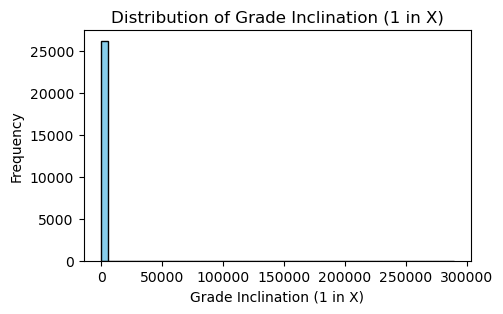

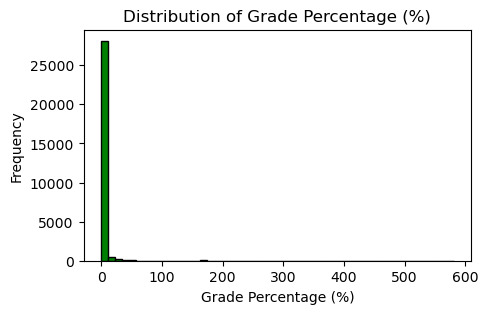

In [70]:
# Histogram for grade1in
plt.figure(figsize=(5, 3))
plt.hist(gdf_cleaned['grade1in'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Grade Inclination (1 in X)')
plt.xlabel('Grade Inclination (1 in X)')
plt.ylabel('Frequency')
plt.show()

# Histogram for gradepc
plt.figure(figsize=(5, 3))
plt.hist(gdf_cleaned['gradepc'].dropna(), bins=50, color='green', edgecolor='black')
plt.title('Distribution of Grade Percentage (%)')
plt.xlabel('Grade Percentage (%)')
plt.ylabel('Frequency')
plt.show()


## Grade Percentage vs Grade Inclination

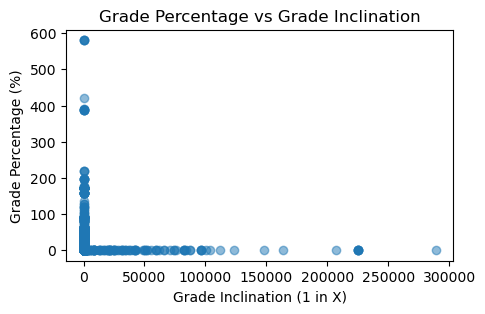

In [71]:
plt.figure(figsize=(5, 3))
plt.scatter(gdf_cleaned['grade1in'], gdf_cleaned['gradepc'], alpha=0.5)
plt.title('Grade Percentage vs Grade Inclination')
plt.xlabel('Grade Inclination (1 in X)')
plt.ylabel('Grade Percentage (%)')
plt.show()


## Steepness by grade percentage Map

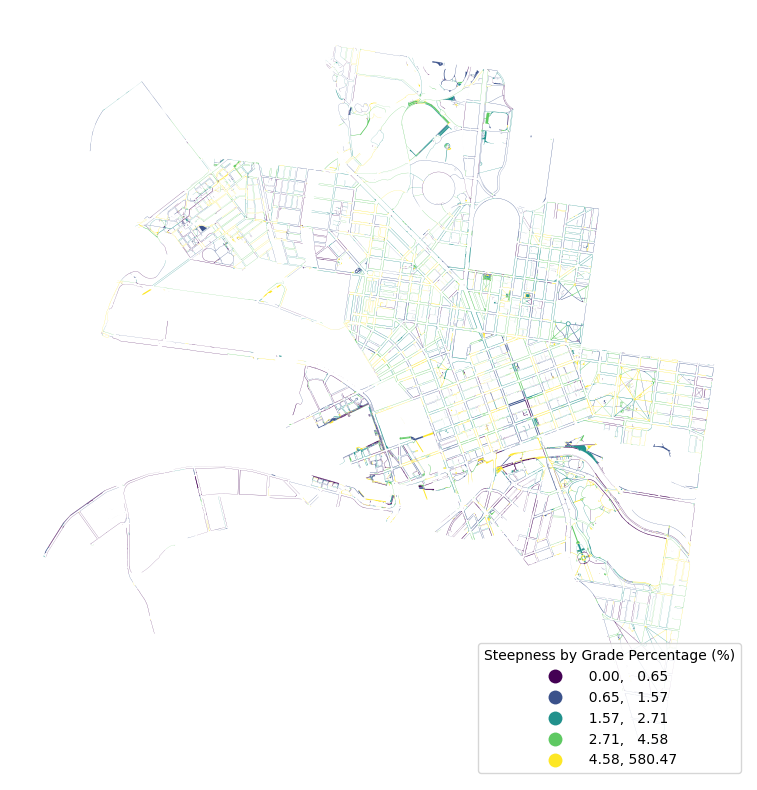

In [74]:
import geopandas as gpd
# Initialize the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the data
gdf_cleaned.plot(column='gradepc', scheme='quantiles', ax=ax, legend=True,
                 legend_kwds={'title': "Steepness by Grade Percentage (%)", 'loc': 'lower right'})

# Set the axis off
ax.set_axis_off()

# Show the plot
plt.show()


## Take sample of 100 rows

## Map with selected Area

In [83]:
gdf_cleaned

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry,lat,lon
0,"{'lon': 144.94866061456034, 'lat': -37.8230361...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94866 -37.82304, 144.94864...",-37.823036,144.948661
3,"{'lon': 144.92075182140118, 'lat': -37.7958016...",None,35.1,2.85,None,None,Road Footway,0.23,NaN,NaN,1387592,None,2.78,2.55,8.07,"POLYGON ((144.92074 -37.79579, 144.92086 -37.7...",-37.795802,144.920752
4,"{'lon': 144.92328274904054, 'lat': -37.7965483...",None,109.6,0.91,None,None,Road Footway,0.01,NaN,NaN,1387085,None,3.39,3.38,1.11,"MULTIPOLYGON (((144.92328 -37.79655, 144.92328...",-37.796548,144.923283
5,"{'lon': 144.94832553398277, 'lat': -37.8235575...",None,4.2,23.81,None,8,Road Footway,6.77,3094.0,30821.0,1388075,Yarra River,6.86,0.09,28.43,"MULTIPOLYGON (((144.94832 -37.82359, 144.94832...",-37.823558,144.948326
6,"{'lon': 144.94735216082958, 'lat': -37.8236801...",None,17.1,5.85,None,8,Road Footway,5.22,3094.0,30734.0,1450305,Yarra River,5.31,0.09,89.26,"MULTIPOLYGON (((144.94735 -37.82369, 144.94735...",-37.823680,144.947352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33577,"{'lon': 144.94351752750893, 'lat': -37.8019853...",None,23.3,4.30,West,1,Road Footway,2.20,585.0,21044.0,1385334,Dryburgh Street between Queensberry Street and...,15.15,12.95,51.21,"MULTIPOLYGON (((144.94355 -37.80172, 144.94358...",-37.801985,144.943518
33579,"{'lon': 144.94306167406037, 'lat': -37.8012486...",None,22.2,4.51,None,None,Road Footway,0.96,NaN,NaN,1385212,None,8.52,7.56,21.29,"MULTIPOLYGON (((144.94303 -37.80134, 144.94308...",-37.801249,144.943062
33582,"{'lon': 144.9434698881252, 'lat': -37.80224148...",None,23.3,4.30,None,None,Road Footway,2.20,NaN,NaN,1385334,None,15.15,12.95,51.21,None,-37.802241,144.943470
33583,"{'lon': 144.94316039147643, 'lat': -37.8024821...",None,20.2,4.94,None,None,Road Footway,1.00,NaN,NaN,1385191,None,15.95,14.95,20.25,"MULTIPOLYGON (((144.94311 -37.80248, 144.94325...",-37.802482,144.943160


In [88]:
import folium
from shapely.geometry import Polygon, Point

# Define bounds and create a bounding box polygon
bounds = [-37.825, -37.820, 144.95, 144.96]
bounding_box = Polygon([(bounds[2], bounds[0]), (bounds[3], bounds[0]), 
                        (bounds[3], bounds[1]), (bounds[2], bounds[1])])

# Create a map centered around the middle of the bounds
m = folium.Map(location=[(bounds[0] + bounds[1]) / 2, (bounds[2] + bounds[3]) / 2], zoom_start=16)

# Add the bounding box as a rectangle on the map
rectangle = [
    [bounds[0], bounds[2]],  # (min_lat, min_lon)
    [bounds[0], bounds[3]],  # (min_lat, max_lon)
    [bounds[1], bounds[3]],  # (max_lat, max_lon)
    [bounds[1], bounds[2]],  # (max_lat, min_lon)
    [bounds[0], bounds[2]]   # close the loop
]
folium.PolyLine(rectangle, color="red", weight=2).add_to(m)

# Process each row in the DataFrame
for idx, row in gdf_cleaned.iterrows():
    if row['geometry'] is not None:  # Check if geometry is not None
        geometry = row['geometry']
        centroid = geometry.centroid

        # Check if centroid is within the bounding box
        if bounding_box.contains(centroid):
            # Add a marker for the location within the bounding box
            folium.Marker([centroid.y, centroid.x],  # folium uses lat, lon order
                          popup=f"Coordinate: {centroid.y}, {centroid.x}").add_to(m)

m  # Display the map


In [80]:
gdf_cleaned['lat'] = gdf_cleaned['geo_point_2d'].apply(lambda x: x['lat'])
gdf_cleaned['lon'] = gdf_cleaned['geo_point_2d'].apply(lambda x: x['lon'])

E:\ANACONDA\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Extract geo points in selected area

In [89]:
# Filter DataFrame
visible_area_df = gdf_cleaned[(gdf_cleaned['lat'] >= bounds[0]) & 
                              (gdf_cleaned['lat'] <= bounds[1]) &
                              (gdf_cleaned['lon'] >= bounds[2]) & 
                              (gdf_cleaned['lon'] <= bounds[3])]

# Show the number of rows filtered or any specific information
print("Number of entries in visible area:", visible_area_df.shape[0])


Number of entries in visible area: 620


## use clustering method to findout the closest footpaths

In [96]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster


# Filter to only include footpaths
footpaths = visible_area_df[visible_area_df['asset_type'] == 'Road Footway']

# Prepare coordinates for distance calculation
coords = footpaths[['lat', 'lon']].to_numpy()

# Calculate the condensed distance matrix
dist_condensed = pdist(coords, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(dist_condensed, method='ward')

# Flat clusters: specify a threshold to form clusters
# The threshold can be adjusted based on the dataset to control the size of clusters
max_d = 10  # Adjust this threshold based on your specific needs
clusters = fcluster(Z, max_d, criterion='distance')

# Find the cluster with the closest 100 paths or adjust the selection based on the number of paths
cluster_labels, counts = np.unique(clusters, return_counts=True)
target_cluster_label = cluster_labels[np.argsort(-counts)[:1]]  # Getting the largest cluster

# Filter rows belonging to the target cluster and limit to 100 if there are more
closest_footpaths = footpaths[clusters == target_cluster_label[0]].head(100)

# Output the result
closest_footpaths

,geo_point_2d,geo_shape,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry,lat,lon
17,"{'lon': 144.95549103598663, 'lat': -37.8227391...",None,30.3,3.30,None,8,Road Footway,1.17,3094.0,30652.0,1556127,Yarra River,1.21,0.04,35.44,"MULTIPOLYGON (((144.95549 -37.82275, 144.95549...",-37.822739,144.955491
2376,"{'lon': 144.95899732368255, 'lat': -37.8244540...",None,266.6,0.38,East,1,Road Footway,0.03,1359.0,22181.0,1383619,Kings Way between City Road and Whiteman Street,0.80,0.77,8.02,"MULTIPOLYGON (((144.95882 -37.82432, 144.95881...",-37.824454,144.958997
2403,"{'lon': 144.9560415475575, 'lat': -37.82227416...",None,9.4,10.66,None,None,Road Footway,0.42,NaN,NaN,1467849,None,2.61,2.19,3.94,"MULTIPOLYGON (((144.95599 -37.82225, 144.95599...",-37.822274,144.956042
2414,"{'lon': 144.95276822153815, 'lat': -37.8217226...",None,NaN,0.00,North,2,Road Footway,0.00,636.0,22446.0,1434485,Flinders Street between Spencer Street and Wur...,3.20,3.20,0.00,"MULTIPOLYGON (((144.95275 -37.82174, 144.95274...",-37.821723,144.952768
2422,"{'lon': 144.95814849627496, 'lat': -37.8211688...",None,NaN,0.00,None,None,Road Footway,0.00,NaN,NaN,1467887,None,2.19,2.19,0.00,"MULTIPOLYGON (((144.95813 -37.82117, 144.95805...",-37.821169,144.958148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19228,"{'lon': 144.95669335805476, 'lat': -37.8249319...",None,100.3,1.00,None,1,Road Footway,0.23,0.0,22454.0,1383817,Intersection of Clarendon Street and Whiteman ...,1.24,1.01,23.07,"MULTIPOLYGON (((144.95667 -37.82493, 144.95671...",-37.824932,144.956693
19352,"{'lon': 144.9500359061619, 'lat': -37.82013621...",None,18.3,5.48,None,2,Road Footway,6.73,526.0,22819.0,1434559,Collins Street between Spencer Street and Batm...,8.80,2.07,122.88,"MULTIPOLYGON (((144.95004 -37.82016, 144.95001...",-37.820136,144.950036
19353,"{'lon': 144.9501328292289, 'lat': -37.82023581...",None,16.6,6.02,South,None,Road Footway,0.81,NaN,NaN,1434531,None,9.60,8.79,13.45,"MULTIPOLYGON (((144.95013 -37.82024, 144.95013...",-37.820236,144.950133
19354,"{'lon': 144.9502220534267, 'lat': -37.82028582...",None,16.6,6.02,None,2,Road Footway,0.81,526.0,22819.0,1434531,Collins Street between Spencer Street and Batm...,9.60,8.79,13.45,"MULTIPOLYGON (((144.95020 -37.82032, 144.95020...",-37.820286,144.950222


In [97]:
import folium


mean_lat = closest_footpaths['lat'].mean()
mean_lon = closest_footpaths['lon'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=14)  # You might adjust zoom_start as needed

# Loop through the DataFrame indices 
for idx in closest_footpaths.index:
    lat = closest_footpaths.loc[idx, 'lat']
    lon = closest_footpaths.loc[idx, 'lon']
    gradepc = closest_footpaths.loc[idx, 'gradepc']  

    # Create a marker for each location in the route
    folium.Marker(
        location=[lat, lon],
        popup=f"Grade PC: {gradepc:.2f}%",  # Format grade percent to 2 decimal places
        icon=folium.Icon(color="blue", icon="info-sign")  # Blue icon with info sign
    ).add_to(m)

# Display the map
m


In [100]:
import folium

# Assuming 'closest_footpaths' is your DataFrame and it's sorted by a preferred path criteria
# Create a map centered around the average coordinates of the points
map_center = [closest_footpaths['lat'].mean(), closest_footpaths['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

# Assuming the first and last points in your DataFrame are the start and end points
start_point = closest_footpaths.iloc[0]
end_point = closest_footpaths.iloc[-1]

# Add markers for start and end points
folium.Marker(
    [start_point['lat'], start_point['lon']],
    popup='Start Point: {}'.format(start_point['gradepc']),
    icon=folium.Icon(color="green", icon="play")
).add_to(m)

folium.Marker(
    [end_point['lat'], end_point['lon']],
    popup='End Point: {}'.format(end_point['gradepc']),
    icon=folium.Icon(color="red", icon="stop")
).add_to(m)

# Connect the points with lines
for i in range(len(closest_footpaths) - 1):
    folium.PolyLine([
        [closest_footpaths.iloc[i]['lat'], closest_footpaths.iloc[i]['lon']],
        [closest_footpaths.iloc[i + 1]['lat'], closest_footpaths.iloc[i + 1]['lon']]
    ], color="blue").add_to(m)

# Display the map
m


In [ ]:
## Use Networkx to find best route considering gradepc

In [109]:
import networkx as nx
from scipy.spatial.distance import euclidean

# Create a graph
G = nx.Graph()

# Add nodes
for i, row in closest_footpaths.iterrows():
    G.add_node(i, lat=row['lat'], lon=row['lon'], gradepc=row['gradepc'])

# Add edges with weights
for i in closest_footpaths.index:
    for j in closest_footpaths.index:
        if i != j:
            dist = euclidean([closest_footpaths.loc[i, 'lat'], closest_footpaths.loc[i, 'lon']], [closest_footpaths.loc[j, 'lat'], closest_footpaths.loc[j, 'lon']])
            weight = dist / (closest_footpaths.loc[i, 'gradepc'] / 100.0)  # Using gradepc as part of the weight calculation
            G.add_edge(i, j, weight=weight)


C:\Users\Dinuk Nadishan\AppData\Local\Temp\ipykernel_19240\2106844887.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  weight = dist / (closest_footpaths.loc[i, 'gradepc'] / 100.0)  # Using gradepc as part of the weight calculation


In [112]:
# Verify nodes are in the graph and find the shortest path
start_node = closest_footpaths.index.min()  # Assuming the first index is the start
end_node = closest_footpaths.index.max()  # Assuming the last index is the end

if start_node in G and end_node in G:
    path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')
else:
    raise ValueError("Start or end node not found in the graph.")


In [115]:
import folium

# Map initialization
m = folium.Map(location=[closest_footpaths['lat'].mean(), closest_footpaths['lon'].mean()], zoom_start=15)

# Plotting each point on the map
for idx in path:
    folium.Marker(
        [closest_footpaths.loc[idx, 'lat'], closest_footpaths.loc[idx, 'lon']],
        popup=f"Index: {idx}, Grad PC: {closest_footpaths.loc[idx, 'gradepc']:.2f}",
        icon=folium.Icon(color="blue" if idx not in [start_node, end_node] else "green" if idx == start_node else "red")
    ).add_to(m)

# Connecting points with lines
for i in range(len(path) - 1):
    folium.PolyLine([
        [closest_footpaths.loc[path[i], 'lat'], closest_footpaths.loc[path[i], 'lon']],
        [closest_footpaths.loc[path[i + 1], 'lat'], closest_footpaths.loc[path[i + 1], 'lon']],
    ], color="red").add_to(m)

# Display the map
m


# CODE DATABASE - The code snippets below are on test!

In [ ]:
-----
#Remove above line!!!!!!!

In [117]:
# Extract coordinates into separate columns
subset_gdf['lat'] = subset_gdf['geo_point_2d'].apply(lambda x: x['lat'])
subset_gdf['lon'] = subset_gdf['geo_point_2d'].apply(lambda x: x['lon'])

# Prepare the coordinates array
coords = subset_gdf[['lat', 'lon']]

# Calculate the Euclidean distance matrix
dist_matrix = cdist(coords, coords, metric='euclidean')

# Print the distance matrix
print(dist_matrix)


SyntaxError: invalid syntax (2119503676.py, line 1)

## Sort locations by gradepc

In [ ]:
max_gradepc = subset_gdf['gradepc'].max()
gradepc_weight = 1 / (subset_gdf['gradepc'] / max_gradepc)  # Normalized and inverted


In [ ]:
adjusted_dist_matrix = dist_matrix + np.outer(gradepc_weight, np.ones(len(gradepc_weight)))


In [ ]:
route = [0]  # start with the index of the first location

# Build the route by moving to the point with the lowest adjusted distance
for _ in range(1, len(coords)):
    last_visited = route[-1]
    # Set distances to already visited locations to infinity
    adjusted_dist_matrix[:, last_visited] = np.inf
    # Find the nearest unvisited location considering adjusted distance
    next_stop = np.argmin(adjusted_dist_matrix[last_visited])
    route.append(next_stop)

# Map to show the route
map_center = [subset_gdf['lat'].mean(), subset_gdf['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=14)


In [ ]:
for idx in route:
    lat = subset_gdf.iloc[idx]['lat']
    lon = subset_gdf.iloc[idx]['lon']
    gradepc = subset_gdf.iloc[idx]['gradepc']
    folium.Marker(
        location=[lat, lon],
        popup=f"Grad PC: {gradepc:.2f}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Display the route as lines on the map
for i in range(len(route)-1):
    folium.PolyLine([
        [subset_gdf.iloc[route[i]]['lat'], subset_gdf.iloc[route[i]]['lon']],
        [subset_gdf.iloc[route[i+1]]['lat'], subset_gdf.iloc[route[i+1]]['lon']]
    ], color="red").add_to(m)

m

In [ ]:
priority_indices = np.argsort(-subset_gdf['gradepc'])

In [ ]:
sorted_gdf = subset_gdf.iloc[priority_indices]
sorted_gdf

## Sorted route by actual DataFrame indices

In [ ]:
if isinstance(priority_indices, pd.Series):
    priority_indices = priority_indices.values

# Initialize route list with the starting point (using the first location as the start)
route = [priority_indices[0]]

# Iterate to build the route
for _ in range(1, len(priority_indices)):
    last_visited = route[-1]
    # Retrieve distances to the last visited location from the distance matrix
    distances_to_last_visited = dist_matrix[last_visited].copy()

    # Set distances to already visited locations to infinity
    distances_to_last_visited[route] = np.inf

    # Find the index of the minimum distance that's not infinity (i.e., unvisited)
    next_stop = np.argmin(distances_to_last_visited)
    
    # Append the next stop to the route
    route.append(next_stop)

# Convert route indices back to original DataFrame indices if necessary
route_indices = priority_indices[route]


sorted_route_gdf = sorted_gdf.iloc[route_indices]
print(sorted_route_gdf)

In [ ]:
map_center = [sorted_route_gdf['lat'].mean(), sorted_route_gdf['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=14)
m

## Display all sample footpaths

In [ ]:

for idx in route:
    # Access the location data by DataFrame index
    lat = sorted_route_gdf.iloc[idx]['lat']
    lon = sorted_route_gdf.iloc[idx]['lon']
    gradepc = sorted_route_gdf.iloc[idx]['gradepc']  # Assuming gradepc is directly a percentage value

    # Create a marker for each location in the route
    folium.Marker(
        location=[lat, lon],
        popup=f"Grade PC: {gradepc:.2f}%",  # Format grade percent to 2 decimal places
        icon=folium.Icon(color="blue", icon="info-sign")  # Blue icon with info sign
    ).add_to(m)

m


In [ ]:
## Suggesting best pathway

In [ ]:
# Display route as lines
for i in range(len(route)-1):
    folium.PolyLine([sorted_route_gdf.iloc[route[i]][['lat', 'lon']].values,
                     sorted_route_gdf.iloc[route[i+1]][['lat', 'lon']].values],
                    color="red").add_to(m)

Best_Route_Map=m
Best_Route_Map

In [ ]:
gdf_cl eaned

In [ ]:
traffic_gdf

## Spatial Join with Pedestrian Data

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert your DataFrame to a GeoDataFrame
traffic_gdf = gpd.GeoDataFrame(
    all_weeks_combined,
    geometry=gpd.points_from_xy(all_weeks_combined.longitude, all_weeks_combined.latitude),
    crs="EPSG:4326"  # Assuming your lat/long is in WGS84
)
# Perform a spatial join using the `predicate` parameter
joined_gdf = gpd.sjoin(traffic_gdf, gdf_cleaned, how="inner", predicate="intersects")

# Analyze the joined GeoDataFrame
# For example, you might summarize pedestrian counts by path steepness or asset type
summary_stats = joined_gdf.groupby('asset_type')['total_of_directions'].describe()
summary_stats

In [ ]:
joined_gdf.columns




In [ ]:
# Categorize steepness to make it more understandable
def categorize_steepness(grade_pc):
    if grade_pc < 2:
        return 'Gentle'
    elif grade_pc < 5:
        return 'Moderate'
    else:
        return 'Steep'

# Apply the categorization
joined_gdf['steepness_category'] = joined_gdf['gradepc'].apply(categorize_steepness)

# Sort the DataFrame by steepness percentage for recommendation
sorted_gdf = joined_gdf.sort_values(by='gradepc')

# If you need to filter out paths based on user preference for less steep paths:
less_steep_paths = sorted_gdf[sorted_gdf['steepness_category'] == 'Gentle']

# Display or utilize the sorted or filtered DataFrame as needed
print(sorted_gdf[['location_id', 'address', 'gradepc', 'steepness_category']])


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'joined_gdf' is already loaded with the 'gradepc' column

# Select a subset of the DataFrame to reduce the size of the distance matrix
subset_gdf = joined_gdf.sample(n=100, random_state=1)  # Adjust the number to suit your needs or system capacity

# Normalize the steepness percentage for the subset
max_steepness = subset_gdf['gradepc'].max()
subset_gdf['normalized_steepness'] = subset_gdf['gradepc'] / max_steepness

# Create a distance matrix based on steepness for the subset
num_paths = len(subset_gdf)
distance_matrix = np.zeros((num_paths, num_paths))

for i in range(num_paths):
    for j in range(num_paths):
        # Calculate the absolute difference in normalized steepness between paths
        distance_matrix[i][j] = abs(subset_gdf.iloc[i]['normalized_steepness'] - subset_gdf.iloc[j]['normalized_steepness'])

# Optionally, print the matrix or parts of it to inspect
print(distance_matrix)


In [ ]:
subset_gdf['centroid'] = subset_gdf['geometry'].centroid
print(subset_gdf['centroid'].isnull().sum())
subset_gdf

In [ ]:
subset_gdf['location_id']

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of gradepc values
plt.hist(subset_gdf['gradepc'], bins=20)
plt.title('Distribution of Grade Percentages')
plt.xlabel('Grade Percentage')
plt.ylabel('Frequency')
plt.show()

# Also, check unique values
print("Unique steepness percentages:", subset_gdf['gradepc'].unique())


In [ ]:
import folium
import geopandas as gpd

# Assuming 'gdf_cleaned' is your GeoDataFrame with the 'gradepc' column

# Convert the GeoDataFrame to GeoJSON
gdf_geojson = gdf_cleaned.to_json()

# Create a Folium map object. Set the initial location to your data's centroid.
# Replace 'your_latitude' and 'your_longitude' with the actual coordinates.
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

folium.GeoJson(
    gdf_geojson,
    name='Steepness by Grade Percentage',
    style_function=lambda feature: {
        'fillColor': 'green' if feature['properties']['gradepc'] < 5 
            else 'yellow' if 5 <= feature['properties']['gradepc'] < 10 
            else 'orange' if 10 <= feature['properties']['gradepc'] < 15 
            else 'red' if 15 <= feature['properties']['gradepc'] < 20 
            else 'darkred',
                      
        
       
        'weight': 0.5,
        'dashArray': '5, 5',
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(fields=['gradepc'], aliases=['Steepness %: '])
).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Add a layer control panel to the map.
folium.LayerControl().add_to(m)

# Display the map
m
